# Análise de Investidores do Tesouro Direto

Neste projeto serão analisados os dados de investidores (pessoas físicas) do tesouro direto que aderiram ao programa no período de janeiro de 2020 a dezembro de 2023. A análise será baseada em dados no formato CSV, acessíveis no portal de [Dados Abertos](https://www.tesourotransparente.gov.br/ckan/dataset) disponibilizados pelo [Tesouro Nacional Transparente](https://www.tesourotransparente.gov.br/).

O Tesouro Direto é um programa do Tesouro Nacional, desenvolvido em parceria com a B3 (antiga BM&F Bovespa), que permite a venda de títulos públicos federais diretamente para pessoas físicas via internet. O objetivo principal do programa é captar recursos para financiar a dívida pública, ao mesmo tempo em que oferece uma forma acessível de investimento, com valores mínimos baixos e liquidez diária.

## Contexto do problema

Com o crescente interesse em investimentos, especialmente em tempos de volatilidade de mercado, o Tesouro Direto tem se tornado uma opção popular entre investidores de diferentes perfis. No entanto, compreender as características demográficas, regionais e comportamentais dos investidores é fundamental para otimizar estratégias de captação e retenção de investidores.

## Demanda do negócio

- ~~Construir uma ABT para execução da análise~~
- Perfil demográfico dos investidores
- Padrões regionais de investimento
- Comportamento operacional dos investidores

## Compreensão dos dados

Os dados disponíveis incluem um arquivo em formato _CSV_ e um arquivo _PDF_ com o dicionário de dados, a útlima atualização ocorreu em _02 de junho de 2024_. Para o projeto de análise de dados serão utilizados as informações dos investidores do período de 2020 a 2023. Esses dados foram extraídos do portal de [Dados Abertos](https://www.tesourotransparente.gov.br/ckan/dataset) disponibilizados pelo [Tesouro Nacional Transparente](https://www.tesourotransparente.gov.br/) sob o título "Investidores do Tesouro Direto". O conjunto de dados inclui informações detalhadas sobre os investidores cadastrados no programa, como data de adesão, profissão, cidade de residência, entre outros. Também há um indicador se o investidor está ou não ativo e outro que sinaliza se o investidor realizou operações nos últimos 12 meses. Cada investidor é identificado por um código único. Caso o investidor tenha cadastro em mais de uma instituição financeira, cada registro adicional é representado por uma nova linha, mantendo o mesmo código de investidor.

## Dicionário de dados

| Variáveis | Descrição | Domínios |
|------------------------------|------------------------------|------------------------------|
| Codigo do Investidor | Código identificador do investidor. | |
| Data de Adesao       | Data de adesão ao programa Tesouro Direto.<br>A data “1900” é atribuída para as pessoas jurídicas cadastradas no Programa. | Calendário |
| Estado Civil | <br>Valor “Não se aplica” é atribuído para as instituições de caridade aptas a receber doações. | Solteiro(a), Desquitado(a), Viúvo(a), Divorciado(a), Casado(a) com brasileiro(a) nato(a), Casado(a) com brasileiro(a) naturalizado(a), Casado(a) com estrangeiro(a), União estável, Separado judic., Não se aplica; |
| Genero | <br>Valor “Não se aplica” é atribuído para as instituições de caridade aptas a receber doações. | M (Masculino), F (Feminino) ou N (Não se aplica) |
| Profissao | <br>Valor “Não se aplica” é atribuído para as instituições de caridade aptas a receber doações. | |
| Idade | <br>Registros com o valor “00*” apresentam erro no cadastro. | |
| UF do Investidor |  | |
| Cidade do Investidor |  | |
| Pais do Investidor |  | |
| Situacao da Conta |  | A (Ativo), D (Desativado). |
| Operou 12 Meses |  | S (Sim), N (Não). |

**Variáveis criadas durante a construção da ABT em formato parquet**

| Variáveis | Descrição |
|------------------------------|------------------------------|
| rank_data_adesao | Rankea as contas ativas e desativadas do investidor. |
| data_proc        | Data em que os dados foram processados. |
| data_ref         | Data de adesão enfatisando mês e ano. |


## Sumário

1. **Importação de bibliotecas**
2. **Carregamento das bases**
3. **Análise do dataframe**
4. **Análise dos dados**
   - 4.1. Limpeza e pré-processamento dos dados
     - 4.1.1. Análise das particularidades dos dados
     - 4.1.2. Análise da tipagem dos dados
     - 4.1.3. Análise da cardinalidade
     - 4.1.4. Análise de valores nulos
     - 4.1.5. Análise de registros duplicados
   - 4.2. Análise das medidas estatísticas dos dados
     - 4.2.1. Análise descritiva das variáveis
     - 4.2.2. Distribuição dos dados em gráfico boxplot
     - 4.2.3. Análise dos outliers identificados
     - 4.2.4. Distribuição dos dados em gráfico histograma
     - 4.2.5. Distribuição dos dados em gráfico de barras
5. **Análise exploratória dos dados**
   - 5.1. Perfil demográfico dos investidores
     - 5.1.1. Distribuição de investidores ativos e desativados
     - 5.1.2. Distribuição das contas ativas por gênero
     - 5.1.3. Distribuição das contas ativas por estado civil e gênero
     - 5.1.4. Distribuição das contas ativas por gênero e faixa etária
     - 5.1.5. Distribuição de profissões das contas ativas por gênero
     - 5.1.6. Distribuição das contas ativas de investidores por faixa etária e profissão
   - 5.2. Padrões regionais de investimento
     - 5.2.1. Distribuição de investidores com contas ativas por estado
     - 5.2.2. Ranking de cidades com mais investidores com contas ativas
     - 5.2.3. Ranking de cidades no estado de São Paulo com mais investidores com contas ativas
   - 5.3. Comportamento operacional dos investidores
     - 5.3.1. Comparação de contas Ativas/Desativadas por faixa etária
     - 5.3.2. Contas Ativas/Desativadas por profissão e estado civil
6. **Conclusões**
   - 6.1. Insights obtidos
   - 6.2. Recomendações


<br>

---

<br>

## 1. Importação de bibliotecas

In [1]:
# Importação de pacotes e definição de parâmetros globais

import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import missingno as msno
import warnings
import gc
import textwrap

from unidecode import unidecode

# Configurações para exibição no Jupyter Notebook

# Configurar opção para exibir todas as linhas do Dataframe
pd.set_option('display.max_rows', None)

# Configurar para exibir o conteúdo completo das colunas
pd.set_option('display.max_colwidth', None)

# Configurar a supressão de mensagens de aviso durante a execução
warnings.filterwarnings('ignore')

# Configurar estilo dos gráficos do seaborn
sns.set_style('whitegrid')

## 2. Carregamento das bases

In [2]:
# Efetuando a limpeza da memória antes do carregamento dos dados
print(f'\nQuantidade de objetos removidos da memória: {gc.collect()}')


Quantidade de objetos removidos da memória: 0


In [3]:
# Caminho dos arquivos PARQUET
caminho_parquet = 'dados/ABT/'

# Criando um dataframe a partir dos arquivos no diretório de dados
df_00 = pd.read_parquet(caminho_parquet, engine='pyarrow')

# Exibindo informações prévias do DataFrame, como tipos de dados, número de 
# colunas e estimativa de memória utilizada
df_00.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39178474 entries, 0 to 39178473
Data columns (total 13 columns):
 #   Column                Dtype   
---  ------                -----   
 0   Codigo do Investidor  int32   
 1   Data de Adesao        object  
 2   Estado Civil          object  
 3   Genero                object  
 4   Profissao             object  
 5   Idade                 int32   
 6   UF do Investidor      object  
 7   Cidade do Investidor  object  
 8   Situacao da Conta     object  
 9   Operou 12 Meses       object  
 10  rank_data_adesao      int32   
 11  data_proc             object  
 12  data_ref              category
dtypes: category(1), int32(3), object(9)
memory usage: 18.6 GB


In [4]:
df_00.head()

,Codigo do Investidor,Data de Adesao,Estado Civil,Genero,Profissao,Idade,UF do Investidor,Cidade do Investidor,Situacao da Conta,Operou 12 Meses,rank_data_adesao,data_proc,data_ref
0,2025,20/01/2020,Desquitado(a),M,ARQUITETO,78,RJ,RIO DE JANEIRO,A,N,1,2024-09-12,2020-01-01
1,4937,10/01/2020,Desquitado(a),M,ECONOMISTA,50,RJ,RIO DE JANEIRO,D,N,1,2024-09-12,2020-01-01
2,5614,09/01/2020,Desquitado(a),M,CONTADOR,47,PR,CURITIBA,A,N,1,2024-09-12,2020-01-01
3,7982,03/01/2020,Desquitado(a),M,SERVIDOR PÚBLICO FEDERAL,51,MG,BELO HORIZONTE,A,N,1,2024-09-12,2020-01-01
4,9182,02/01/2020,Casado(a) com brasileiro(a) naturalizado(a),M,MÉDICO,44,PE,ARARIPINA,A,N,1,2024-09-12,2020-01-01


## 3. Análise do dataframe

In [5]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA\n')
print(f'Quantidade de linhas (registros):  {df_00.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df_00.shape[1]}')



VOLUMETRIA

Quantidade de linhas (registros):  39178474
Quantidade de colunas (variáveis): 13


In [6]:
def gerar_metadados(dataframe):
    '''
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: Dataframe
        DataFrame para o qual os metadados serão gerados.

    :return: DataFrame
        DataFrame contendo os metadados.
    '''
    metadados = pd.DataFrame({
        'Variável': dataframe.columns,
        'Tipo': dataframe.dtypes,
        'Qtde de nulos': dataframe.isnull().sum(),
        '% de nulos': round((dataframe.isnull().sum()/len(dataframe))*100, 2),
        'Cardinalidade': dataframe.nunique(),
    })
    metadados = metadados.sort_values(by='Qtde de nulos', ascending=False)
    metadados = metadados.reset_index(drop=True)
    return metadados

In [7]:
# Exibindo os metadados do dataframe

gerar_metadados(df_00)


,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Codigo do Investidor,int32,0,0.0,24612020
1,Data de Adesao,object,0,0.0,1461
2,Estado Civil,object,0,0.0,9
3,Genero,object,0,0.0,3
4,Profissao,object,0,0.0,158
5,Idade,int32,0,0.0,125
6,UF do Investidor,object,0,0.0,28
7,Cidade do Investidor,object,0,0.0,15657
8,Situacao da Conta,object,0,0.0,2
9,Operou 12 Meses,object,0,0.0,2


## 4. Análise dos dados

### 4.1. Limpeza e pré-processamento dos dados

In [8]:
# Redefinindo o index do Dataframe
df_00.reset_index(inplace=True, drop=True)

# Gerando uma cópia dos dados para execução da análise
df_01 = df_00.copy()

#### 4.1.1. Análise das particularidades dos dados

In [9]:
# Dicionário com variáveis e seus respectivos valores a serem verificados
vars = {
    'Data de Adesao': 1900,
    'Estado Civil': 'Não se aplica',
    'Genero': 'Não se aplica',
    'Profissao': 'Não se aplica',
    'Idade': 0
}

# Loop para contar quantas vezes o valor especificado aparece em cada variável
for var, val in vars.items():
    # Obtém a contagem de registros com o valor especificado, retornando 0 se não houver
    qtd = df_01[var].value_counts().get(val, 0)
    print(f"Quantidade de registros na variável '{var}' com o valor '{val}': {qtd}.")


Quantidade de registros na variável 'Data de Adesao' com o valor '1900': 0.
Quantidade de registros na variável 'Estado Civil' com o valor 'Não se aplica': 4046.
Quantidade de registros na variável 'Genero' com o valor 'Não se aplica': 0.
Quantidade de registros na variável 'Profissao' com o valor 'Não se aplica': 1236.
Quantidade de registros na variável 'Idade' com o valor '0': 880.


In [10]:
# Filtrando o dataframe para remover registros com valores indesejados
df_01 = df_01[
    (df_01['Estado Civil'] != 'Não se aplica') &
    (df_01['Genero'] != 'Não se aplica') &
    (df_01['Profissao'] != 'Não se aplica') &
    (df_01['Idade'] > 0)
]

In [11]:
# Exclusão da coluna 'Operou 12 Meses' pelo fato dos dados não compreender
# atividade da conta em 12 meses

df_01.drop('Operou 12 Meses', axis=1, inplace=True)

O público-alvo da análise é composto por pessoas físicas. Conforme indicado no **dicionário de dados**, alguns registros referem-se a entidades que não pertencem a essa categoria, razão pela qual foram excluídos da análise.

O período do estudo vai de _janeiro de 2020_ a _dezembro de 2023_, e a última atualização dos dados ocorreu em **02 de junho de 2024**. No entanto, não foi possível garantir que a coluna **Operou 12 meses** refira-se a um período de 12 meses retroativos à data da atualização, o que motivou a sua remoção do conjunto de dados.

#### 4.1.2. Análise da tipagem dos dados

In [12]:
# Identificando os tipos de dados das colunas

df_01.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
Codigo do Investidor,int32
Data de Adesao,object
Estado Civil,object
Genero,object
Profissao,object
Idade,int32
UF do Investidor,object
Cidade do Investidor,object
Situacao da Conta,object
rank_data_adesao,int32


In [13]:
# Efetuando as conversões necessárias da tipagem dos dados

# Transforma para o tipo de dados int32
df_01['Codigo do Investidor'] = df_01['Codigo do Investidor'].astype('int32', errors='ignore')

# Transforma para o tipo de dados datetime
df_01['Data de Adesao'] = pd.to_datetime(df_01['Data de Adesao'], format='%d/%m/%Y')
df_01['data_proc'] = pd.to_datetime(df_01['data_proc'], format='%Y-%m-%d')
df_01['data_ref'] = pd.to_datetime(df_01['data_ref'], format='%Y-%m-%d')

# Transforma para o tipo de dados int8
df_01['Idade'] = df_01['Idade'].astype('int8', errors='ignore')
df_01['rank_data_adesao'] = df_01['rank_data_adesao'].astype('int8', errors='ignore')

# Transforma para o tipo de dados category
df_01['Situacao da Conta'] = df_01['Situacao da Conta'].astype('category', errors='ignore')

df_01.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
Codigo do Investidor,int32
Data de Adesao,datetime64[ns]
Estado Civil,object
Genero,object
Profissao,object
Idade,int8
UF do Investidor,object
Cidade do Investidor,object
Situacao da Conta,category
rank_data_adesao,int8


O estudo e o ajuste da tipagem dos dados possibilitarão uma análise mais precisa, permitindo a apresentação clara e detalhada de informações estatísticas, gráficos, tabelas de valores, entre outros recursos analíticos.

#### 4.1.3. Análise da cardinalidade

In [14]:
def exibe_valores_unicos(df, colunas, qtde_unicos):
    '''
    Exibe a quantidade de valores únicos de coluna(s) específica(s), limitado a
    número limite de cardinalidade.

    :param df: DataFrame
        DataFrame a ser analisado.
    :param colunas: list
        Lista de colunas a ser analisada.
    :param qtde_unicos: int
        Quantidade máxima de valores únicos para exibição.
        
    :return: None
    '''
    # Itera sobre as colunas especificadas
    for col in colunas:
        # Verifica se o número de valores únicos é menor ou igual ao limite especificado
        if df[col].nunique() <= qtde_unicos:
            # Cria um DataFrame com a contagem de valores únicos
            coluna_qtde = pd.DataFrame(df[col].value_counts().sort_index())
            
            # Renomear colunas
            coluna_qtde = coluna_qtde.rename(columns={col: 'Quantidade'})
            
            # Transpõe o resultado
            coluna_qtde = coluna_qtde.T
            
            # Exibe o DataFrame
            display(coluna_qtde)


# Obtém as colunas do DataFrame
cols = df_01.columns

# Define a quantidade máxima de valores únicos a serem exibidos
qtde_unicos = 10

# Chama a função para exibir os valores únicos das colunas
exibe_valores_unicos(df_01, cols, qtde_unicos)

Estado Civil,Casado(a) com brasileiro(a) nato(a),Casado(a) com brasileiro(a) naturalizado(a),Desquitado(a),Divorciado(a),Separado judic.,Solteiro(a),União estável,Viúvo(a)
count,572980,752835,10099354,2247977,5315,24964311,26078,504593


Genero,F,M
count,9738049,29435394


Situacao da Conta,A,D
count,33532938,5640505


data_proc,2024-09-12
count,39173443


In [15]:
# Exclusão da coluna 'data_proc' por apresentar uma única informação

df_01.drop('data_proc', axis=1, inplace=True)

O estudo da cardinalidade permite uma análise preliminar da distribuição e diversidade dos dados. Foi identificado que a variável **data_proc** possui cardinalidade 1, ou seja, contém apenas um valor distinto. Por esse motivo, ela está sendo excluída do conjunto de dados.

#### 4.1.4. Análise de valores nulos

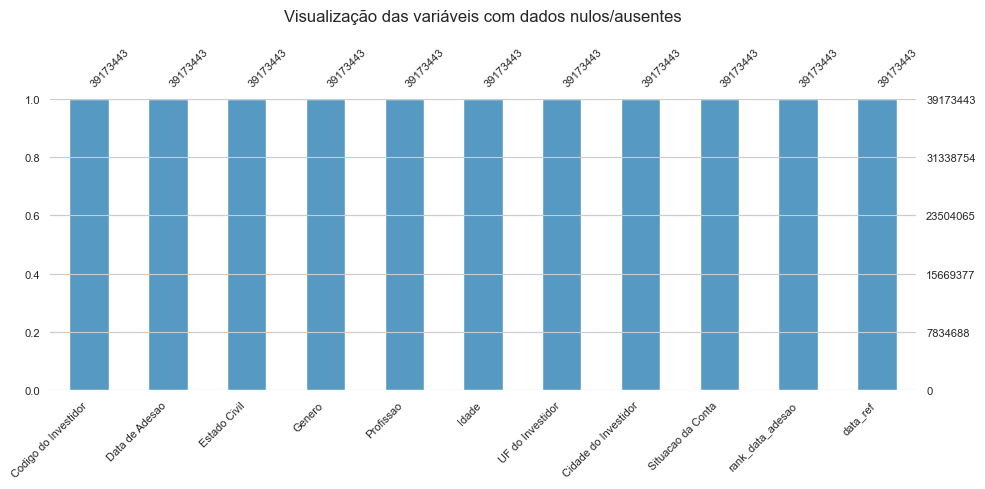

In [16]:
# Definindo as cores
colors = ['#274657' if df_01[col].isnull().any() else '#569AC4' for col in df_01.columns]
    
# Criando o gráfico de barras
plt.figure(figsize=(10, 5))
ax = plt.subplot()
msno.bar(df_01, color=colors, fontsize=8, ax=ax)
plt.title('Visualização das variáveis com dados nulos/ausentes\n')
    
# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [17]:
# Verificando se há valores compostos apenas de espaços em branco
espacos = df_01.applymap(lambda x: isinstance(x, str) and x.strip() == '')

# Filtrando as colunas que possuem espaços em branco
cols_com_espacos = espacos.any()

# Exibindo as colunas que têm valores com apenas espaços em branco
lista_cols_com_espacos = cols_com_espacos[cols_com_espacos].index.tolist()

# Contando o número de registros com espaços em branco em cada coluna
qtde_espacos_por_coluna = espacos.sum()

# Exibindo as colunas com espaços em branco e a quantidade de registros correspondentes
for col in lista_cols_com_espacos:
    print(f'\nColuna \'{col}\' tem {qtde_espacos_por_coluna[col]} registros com espaços em branco.')


Coluna 'UF do Investidor' tem 7 registros com espaços em branco.


In [18]:
# Verificando se há valores compostos apenas de espaços em branco na coluna 'UF do Investidor'
df_01 = df_01[~df_01['UF do Investidor'].apply(lambda x: isinstance(x, str) and x.strip() == '')]

# Verificando se os registros foram removidos
print(f'\nRegistros após remoção: {df_01.shape[0]}')



Registros após remoção: 39173436


Na análise do gráfico, não foram identificados dados ausentes ou nulos. No entanto, ao verificar valores compostos apenas por espaços em branco, foram encontradas 7 ocorrências na variável **UF do Investidor**. Devido à baixa incidência, optou-se pela exclusão desses registros.

#### 4.1.5. Análise de registros duplicados

In [19]:
# Exibindo a quantidade de registros duplicados

df_01.duplicated(keep='first').value_counts(
).to_frame().rename(columns={'count': 'Quantidade'})

,Quantidade
False,39173436


Neste caso, a existência de registros duplicados não indica um erro em alguma etapa da construção do conjunto de dados. Pelo contrário, reflete a possibilidade de um mesmo investidor possuir uma ou mais contas em diferentes instituições financeiras, que gerenciam seus ativos no Tesouro Direto.

In [20]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA APÓS LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS\n')
print(f'Quantidade de linhas (registros):  {df_01.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df_01.shape[1]}')


VOLUMETRIA APÓS LIMPEZA E PRÉ-PROCESSAMENTO DOS DADOS

Quantidade de linhas (registros):  39173436
Quantidade de colunas (variáveis): 11


In [21]:
# Exibindo os metadados do dataframe

gerar_metadados(df_01)

,Variável,Tipo,Qtde de nulos,% de nulos,Cardinalidade
0,Codigo do Investidor,int32,0,0.0,24608513
1,Data de Adesao,datetime64[ns],0,0.0,1461
2,Estado Civil,object,0,0.0,8
3,Genero,object,0,0.0,2
4,Profissao,object,0,0.0,157
5,Idade,int8,0,0.0,124
6,UF do Investidor,object,0,0.0,27
7,Cidade do Investidor,object,0,0.0,15655
8,Situacao da Conta,category,0,0.0,2
9,rank_data_adesao,int8,0,0.0,29


### 4.2. Análise das medidas estatísticas dos dados

#### 4.2.1. Análise descritiva das variáveis

In [22]:
# Estatística descritiva das variáveis numéricas

# Obtém as colunas do dataframe que são numéricas
cols = df_01.select_dtypes(include='number').columns.drop(
    ['Codigo do Investidor', 'rank_data_adesao'])

# Gera a estatística descritiva e transpõe o resultado
df_01[cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,39173436.0,35.278561,11.963426,1.0,26.0,33.0,42.0,124.0


In [23]:
# Estatística descritiva das variáveis categóricas

# Obtém as colunas do dataframe que são categóricas
cols = df_01.select_dtypes(include=['object', 'category']).columns

# Gera a estatística descritiva e transpõe o resultado
df_01[cols].describe().T

,count,unique,top,freq
Estado Civil,39173436,8,Solteiro(a),24964304
Genero,39173436,2,M,29435392
Profissao,39173436,157,OUTROS,12446795
UF do Investidor,39173436,27,SP,11930989
Cidade do Investidor,39173436,15655,SAO PAULO,3876335
Situacao da Conta,39173436,2,A,33532931
data_ref,39173436,48,2021-11-01 00:00:00,2171835


#### 4.2.2. Distribuição dos dados em gráfico boxplot

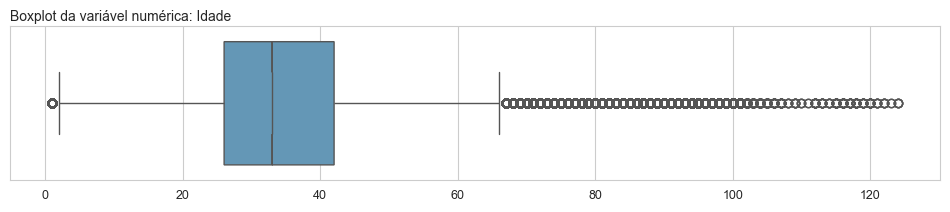

In [24]:
# Geração de gráficos boxplot para variáveis numéricas do DataFrame.

# Seleciona apenas variáveis numéricas, excluindo 'Codigo do Investidor'
colunas_numericas = df_01.select_dtypes(
    include=['number']).columns.drop(['Codigo do Investidor', 'rank_data_adesao'])

# Calcula a quantidade de subplots necessário
qtde_subplots = len(colunas_numericas)

# Cria subplots dinamicamente
fig, axs = plt.subplots(qtde_subplots, 1, figsize=(12, 2 * qtde_subplots),
                        gridspec_kw={'hspace': 0.6})

# Caso haja apenas uma variável, ajusta axs para ser uma lista
if qtde_subplots == 1:
    axs = [axs]

# Loop sobre as variáveis numéricas e plota o boxplot
for i, col in enumerate(colunas_numericas):
    sns.boxplot(data=df_01[col], ax=axs[i],
                notch=True, orient='h', color='#569AC4')
    # Configura o título e ajusta os rótulos dos eixos
    axs[i].set_title(
        f'Boxplot da variável numérica: {col}', loc='left', fontsize=10, pad=4)
    axs[i].set(xlabel='', ylabel='')
    # Ajusta o tamanho dos rótulos
    axs[i].tick_params(labelsize=9)
    # Exibe rótulos sem formatação especial
    axs[i].ticklabel_format(style='plain', axis='x')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.show()

#### 4.2.3. Análise dos outliers identificados

In [25]:
# Geração dos limites inferior e superior das variáveis que apresentaram outliers

# Seleciona colunas numéricas, excluindo 'Codigo do Investidor'
cols_numericas = df_01.select_dtypes(include=['number']).columns.drop('Codigo do Investidor')

for col in cols_numericas:

    # Calcula quartis e intervalo interquartil (IIQ)
    Q1 = df_01[col].quantile(.25)
    Q3 = df_01[col].quantile(.75)
    IIQ = Q3 - Q1

    # Define limites inferior e superior para outliers
    limite_inferior = Q1 - 1.5 * IIQ
    limite_superior = Q3 + 1.5 * IIQ

    # Calcula a quantidade de dados fora dos limites
    outliers_acima = len(df_01[df_01[col] > limite_superior])
    outliers_abaixo = len(df_01[df_01[col] < limite_inferior])
    
    # Calcula a quantidade total de dados fora dos limites
    total_outliers = outliers_acima + outliers_abaixo
    
    # Calcula a porcentagem total de dados fora dos limites
    total_outliers_perc = total_outliers / df_01.shape[0]

    # Exibe informações
    print(f'\n{col.upper()}')
    print(f'Intervalo interquartil (IIQ): {IIQ:.2f}')
    print(f'Limite inferior: {limite_inferior:.2f}')
    print(f'Limite superior: {limite_superior:.2f}')
    print(f'Os outliers correspondem a {total_outliers_perc:.2%} ({total_outliers}) dos dados da variável.')


IDADE
Intervalo interquartil (IIQ): 16.00
Limite inferior: 2.00
Limite superior: 66.00
Os outliers correspondem a 1.99% (778971) dos dados da variável.

RANK_DATA_ADESAO
Intervalo interquartil (IIQ): 1.00
Limite inferior: -0.50
Limite superior: 3.50
Os outliers correspondem a 6.43% (2517183) dos dados da variável.


In [26]:
def valores_outliers(dataframe, coluna, limite, sinal):
    '''
    Exibe os valores únicos dos outliers

    :param col: Column Dataframe
        Dataframe e coluna a ser analisado.
    :param lim: int
        Valor do limite inferior ou superior.
    :param sinal: str
        Símbolo de maior(>) ou menor(<).
        
    :return: None
    '''
    arr = np.array(dataframe[coluna])
    if sinal == '>':
        val = arr[np.where(arr > limite)[0]]
    else:
        val = arr[np.where(arr < limite)[0]]
    print(f'\n{coluna.upper()}: {np.unique(val)}')

In [27]:
valores_outliers(df_01, 'Idade', limite_superior, '>')


IDADE: [  4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124]


Para a variável **Idade**, foram identificados _outliers_ acima de 66 anos. No entanto, esses valores extremos não indicam necessariamente um problema com o conjunto de dados. Além disso, não é possível determinar um limite máximo absoluto, como 100 anos, para definir se a idade é um valor válido ou não. Portanto, os registros com essas idades serão mantidos no conjunto de dados.

#### 4.2.4. Distribuição dos dados em gráfico histograma

In [28]:
def grafico_histplot_variavel(dataframe, variavel):
    '''
    Função para gerar um gráfico histplot para uma variável numérica do DataFrame.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    :param variavel: str
        Variável numérica a ser plotada.
    '''
    
    # Verifica se a variável é numérica
    if variavel not in dataframe.select_dtypes(include=['number']).columns:
        raise ValueError(f"A variável '{variavel}' não é numérica.")

    # Criar o gráfico
    plt.figure(figsize=(10, 5))
    
    sns.histplot(data=dataframe, x=variavel, bins=25, kde=True, color='#569AC4')

    # Configura o título e formatação dos eixos
    plt.title(f'Histograma da variável: {variavel}', loc='left', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

    # Ajusta o tamanho dos rótulos
    plt.tick_params(labelsize=10)

    # Exibe rótulos sem formatação especial (sem notação científica)
    plt.ticklabel_format(style='plain', axis='y')

    # Ajusta o layout para evitar sobreposição de elementos
    plt.tight_layout()
    plt.show()


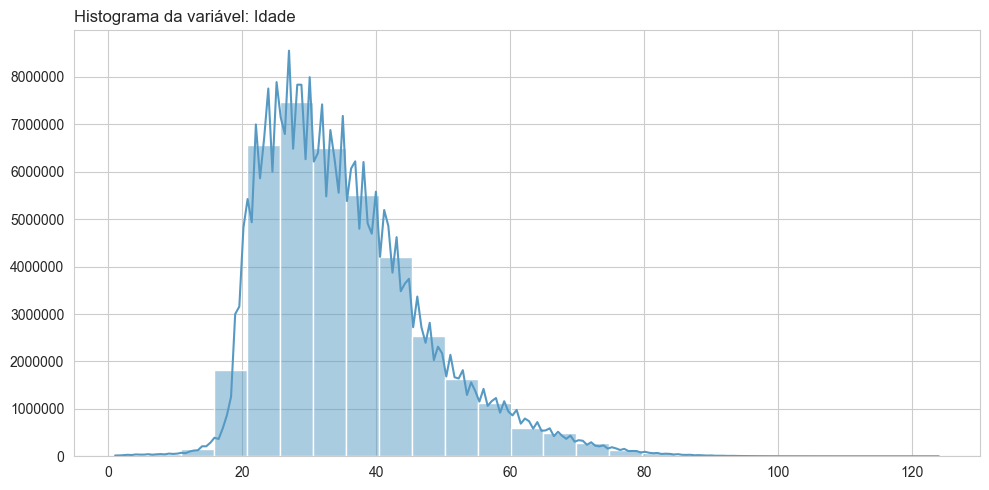

In [29]:
grafico_histplot_variavel(df_01, 'Idade')

#### 4.2.5. Distribuição dos dados em gráfico de barras

In [30]:
def grafico_countplot_variavel(dataframe, variavel, rotacao_rotulos_x=45, orientacao_valores='h'):
    '''
    Função para gerar um gráfico de barras (countplot) para uma única variável do DataFrame,
    ajustando a orientação dos rótulos do eixo X e a orientação dos valores nas barras.

    :param dataframe: DataFrame
        DataFrame a ser analisado.
    :param variavel: str
        Variável a ser plotada.
    :param rotacao_rotulos_x: int, optional
        Ângulo de rotação dos rótulos no eixo X (padrão é 45 graus).
    :param orientacao_valores: str, optional
        Orientação dos valores que ficam sobre as barras: 
        'h' para horizontal (padrão) ou 'v' para vertical.
    '''
    
    # Função para simplificar a visualização de grandes números
    def formatar_milhoes(x, _):
        if x >= 1e6:
            return f'{x / 1e6:.1f}M'
        elif x >= 1e3:
            return f'{x / 1e3:.1f}K'
        else:
            return str(int(x))

    # Criar o gráfico
    plt.figure(figsize=(10, 5))
    
    ax = sns.countplot(data=dataframe, x=variavel, color='#569AC4')
    
    # Rotacionar os rótulos do eixo X
    plt.xticks(rotation=rotacao_rotulos_x, ha='center', fontsize=9)
    plt.yticks(fontsize=9)

    # Formatar os números do eixo Y para milhões ou milhares
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhoes))

    # Título e formatação dos eixos
    plt.title(f'Countplot da variável: {variavel}', loc='right', fontsize=12)
    plt.xlabel('')
    plt.ylabel('')

    # Função para formatar os rótulos das barras
    def formatar_valores(val):
        if val >= 1e6:
            return f'{val / 1e6:.1f}M'
        elif val >= 1e3:
            return f'{val / 1e3:.1f}K'
        else:
            return str(int(val))

    # Adicionar rótulos (valores) nas barras, com a orientação especificada
    for container in ax.containers:
        labels = [formatar_valores(val) for val in container.datavalues]
        ax.bar_label(container, labels=labels, size=9, label_type='edge', 
                     rotation=90 if orientacao_valores == 'v' else 0)

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()
    plt.show()


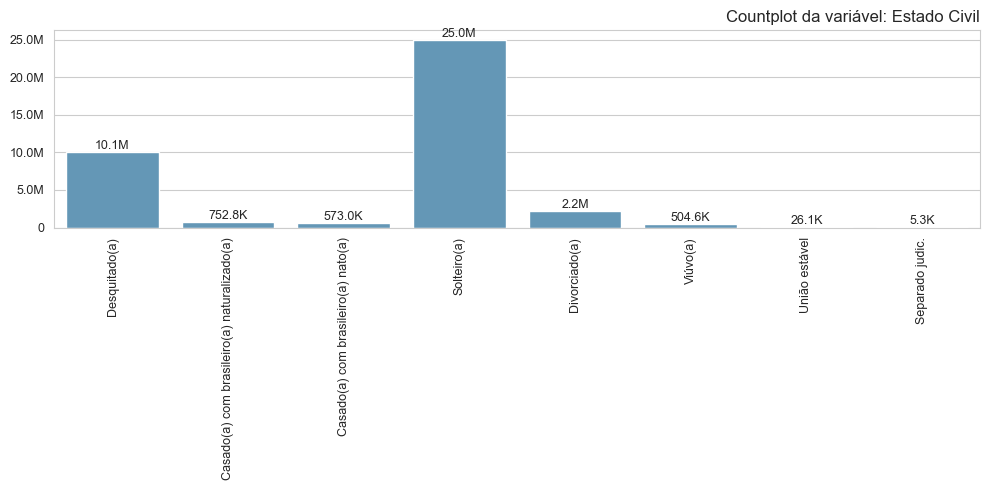

In [31]:
grafico_countplot_variavel(df_01, 'Estado Civil', rotacao_rotulos_x=90, orientacao_valores='h')

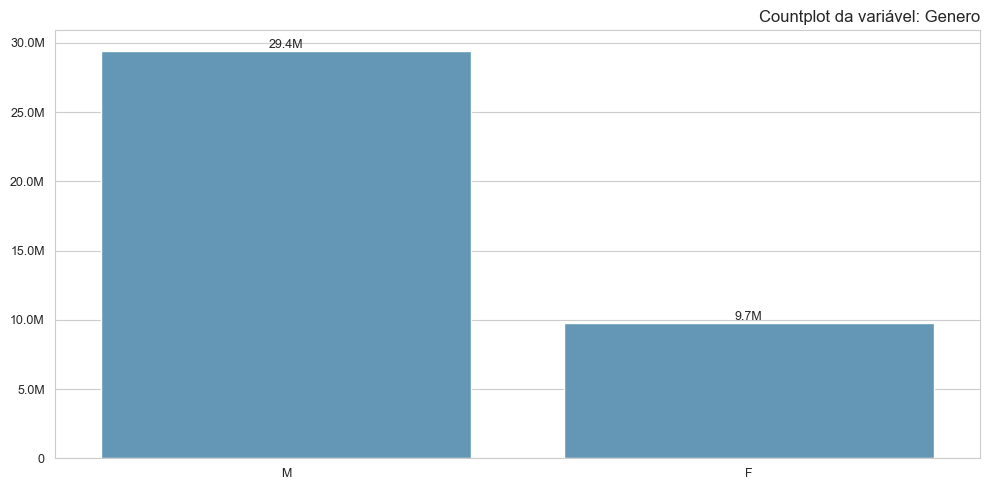

In [32]:
grafico_countplot_variavel(df_01, 'Genero', rotacao_rotulos_x=0, orientacao_valores='h')

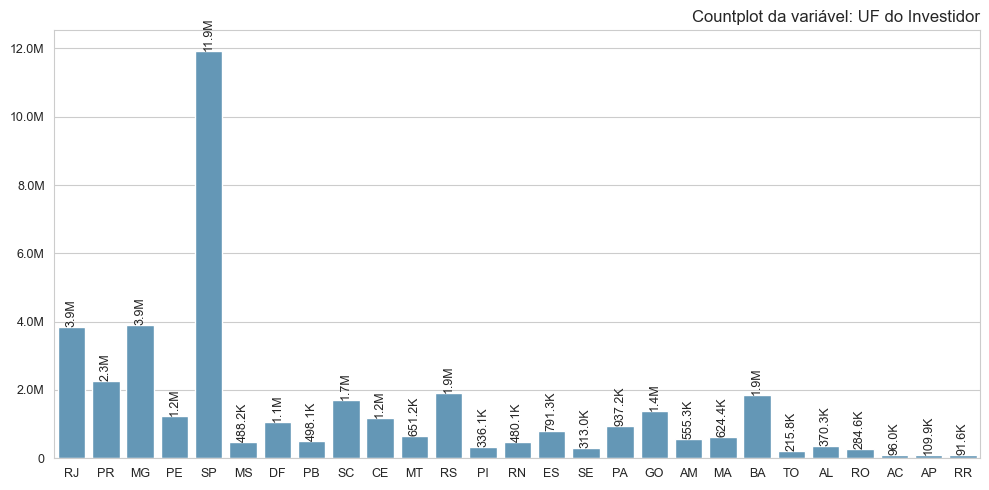

In [33]:
grafico_countplot_variavel(df_01, 'UF do Investidor', rotacao_rotulos_x=0, orientacao_valores='v')

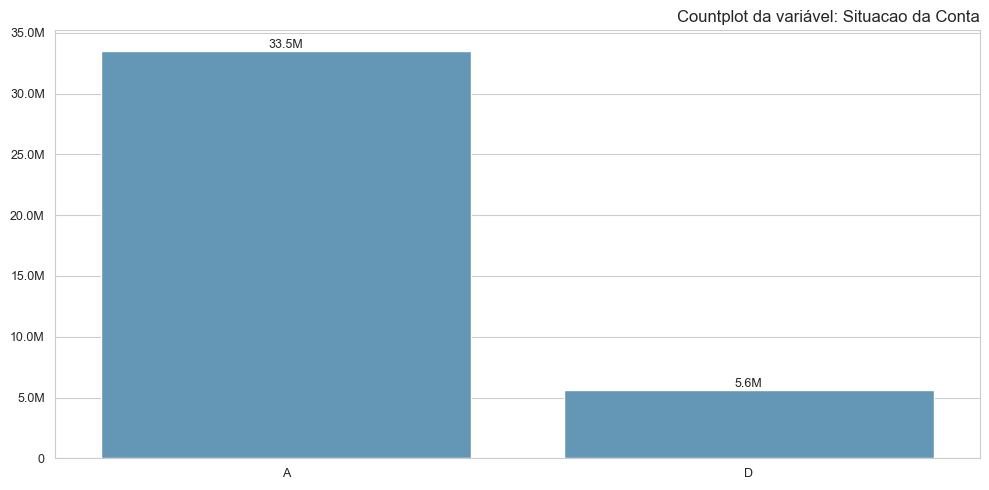

In [34]:
grafico_countplot_variavel(df_01, 'Situacao da Conta', rotacao_rotulos_x=0, orientacao_valores='h')

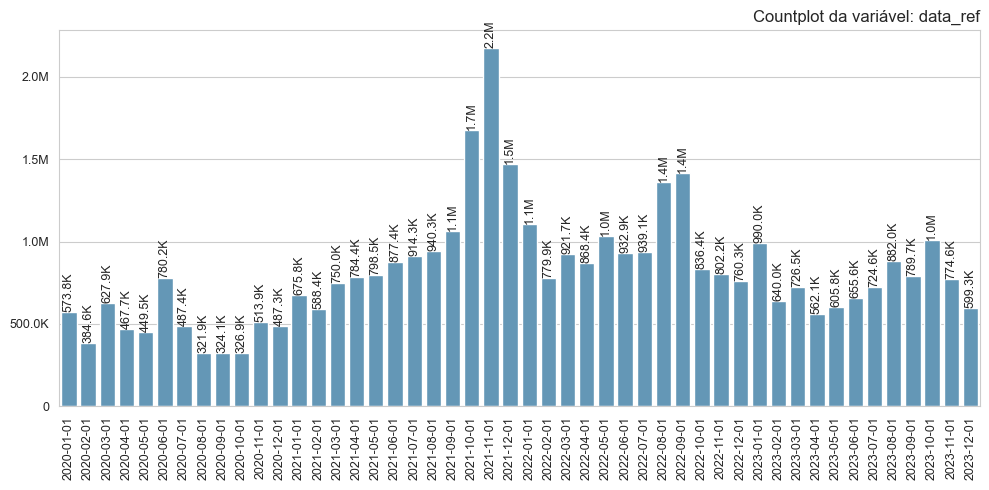

In [35]:
grafico_countplot_variavel(df_01, 'data_ref', rotacao_rotulos_x=90, orientacao_valores='v')

O estudo da distribuição dos dados nas variáveis numéricas e categóricas já permite extrair algumas observações iniciais:

- **Idade**: A maior concentração de participantes no programa Tesouro Direto está na faixa etária de 20 a 40 anos.
- **Estado Civil**: O estado civil mais comum entre os investidores é _solteiro_, com **25 milhões** de registros.
- **Gênero**: O gênero _masculino_ predomina no programa, com **29,4 milhões** de participantes.
- **UF do Investidor**: Estados da região Sudeste, como _SP_, _MG_ e _RJ_, lideram em número de investidores cadastrados.
- **Situação da Conta**: Existem **33,5 milhões** de contas ativas em operação.
- **data_ref**: Os meses de outubro, novembro e dezembro de 2021 marcaram o período de maior adesão ao programa.


## 5. Análise exploratória dos dados

In [36]:
# Redefinindo o index do Dataframe
df_01.reset_index(inplace=True, drop=True)

# Gerando uma cópia dos dados para execução da análise
df_02 = df_01.copy()

In [37]:
# Ordenar o DataFrame
df_02 = df_02.sort_values(
    by=['Codigo do Investidor', 'Data de Adesao'], ascending=[True, False])

# Separando contas ativas e desativadas
contas_ativas = df_02[df_02['Situacao da Conta'] == 'A']
contas_desativadas = df_02[df_02['Situacao da Conta'] == 'D']

# Encontrando a conta ativa mais recente por investidor
contas_ativas_recentes = contas_ativas.loc[
    contas_ativas.groupby('Codigo do Investidor')['Data de Adesao'].idxmax()]

# Separando os investidores com todas as contas desativadas
contas_desativadas_recentes = contas_desativadas[
    ~contas_desativadas['Codigo do Investidor'].isin(
        contas_ativas_recentes['Codigo do Investidor'])]

# Encontrando a conta desativada mais recente por investidor
contas_desativadas_recentes = contas_desativadas_recentes.loc[
    contas_desativadas_recentes.groupby('Codigo do Investidor')['Data de Adesao'].idxmax()]

# Adicionando as contas ativas e desativadas mais recentes
df_001 = pd.concat(
    [contas_ativas_recentes, contas_desativadas_recentes], ignore_index=True)

In [ ]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA\n')
print(f'Quantidade de linhas (registros):  {df_001.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df_001.shape[1]}')

In [ ]:
# Ordenar o DataFrame por Codigo do Investidor e Data de Adesao (mais recente primeiro)
df_02 = df_02.sort_values(by=['Codigo do Investidor', 'Data de Adesao'], ascending=[True, False])

# Separando contas ativas e desativadas
contas_ativas = df_02[df_02['Situacao da Conta'] == 'A']
contas_desativadas = df_02[df_02['Situacao da Conta'] == 'D']

# Encontrando a conta ativa mais recente por investidor
contas_ativas_recentes = contas_ativas.loc[
    contas_ativas.groupby('Codigo do Investidor')['Data de Adesao'].idxmax()]

# Separando os investidores com todas as contas desativadas
contas_desativadas_recentes = contas_desativadas[
    ~contas_desativadas['Codigo do Investidor'].isin(contas_ativas_recentes['Codigo do Investidor'])]

# Encontrando a conta desativada mais recente por investidor
contas_desativadas_recentes = contas_desativadas_recentes.loc[
    contas_desativadas_recentes.groupby('Codigo do Investidor')['Data de Adesao'].idxmax()]

# Concatenar as contas ativas e desativadas mais recentes
df_001 = pd.concat([contas_ativas_recentes, contas_desativadas_recentes], ignore_index=True)

# Remover duplicatas com base no 'Codigo do Investidor' (mantendo apenas um registro por investidor)
df_001 = df_001.drop_duplicates(subset=['Codigo do Investidor'])

In [ ]:
# Exibindo a quantidade de linhas e colunas do dataframe

print(f'\nVOLUMETRIA\n')
print(f'Quantidade de linhas (registros):  {df_001.shape[0]}')
print(f'Quantidade de colunas (variáveis): {df_001.shape[1]}')

In [ ]:
import sys
sys.exit()

### 5.1. Perfil demográfico dos investidores

#### 5.1.1. Distribuição de investidores ativos e desativados

In [41]:
def graf_pieplot(dataframe, col_perc, colors, title, legend):
    # Criar gráfico de pizza
    fig, ax = plt.subplots(figsize=(6, 6))

    # Capturar os textos do gráfico de pizza
    wedges, texts, autotexts = ax.pie(
        dataframe[col_perc], labels=None, autopct='%0.2f%%', colors=colors, textprops={'fontsize': 12})

    # Alterar a cor da fonte dos rótulos de autopreenchimento para branco
    for autotext in autotexts:
        autotext.set_color('white')

    # Adicionar legendas
    ax.legend(legend, loc='right', labelspacing=1.5,
              bbox_to_anchor=(1.0, 0.1, 0.6, 0.9))

    # Adicionar tabela
    cell_text = dataframe.apply(
        lambda x: [f'{int(x["Qtde"]):.0f}', f'{x["%"]:.2f}'], axis=1).tolist()
    tabela = plt.table(cellText=cell_text, colLabels=[
        'Quantidade', '%'], loc='bottom right', bbox=(1.1, 0.05, 0.5, 0.3))
    tabela.auto_set_font_size(False)
    tabela.set_fontsize(11)

    # Alterar a cor da grade da tabela
    for key, cell in tabela.get_celld().items():
        cell.set_edgecolor('lightgrey')

    # Ajustar layout
    plt.axis('equal')

    # Adicionar título
    plt.title(f'{title}', fontsize=12)

    # Exibindo o gráfico
    plt.show()

In [42]:
# Calcular a contagem de cada categoria da coluna 'Situacao da Conta'
df_filtro = df_001['Situacao da Conta'].value_counts()

# Calcular a porcentagem de cada categoria
df_filtro_perc = df_filtro / df_filtro.sum() * 100

# Criar um novo DataFrame contendo as quantidades (Qtde) e as porcentagens (%)
df_filtro_01 = pd.DataFrame({'Qtde': df_filtro, '%': df_filtro_perc})

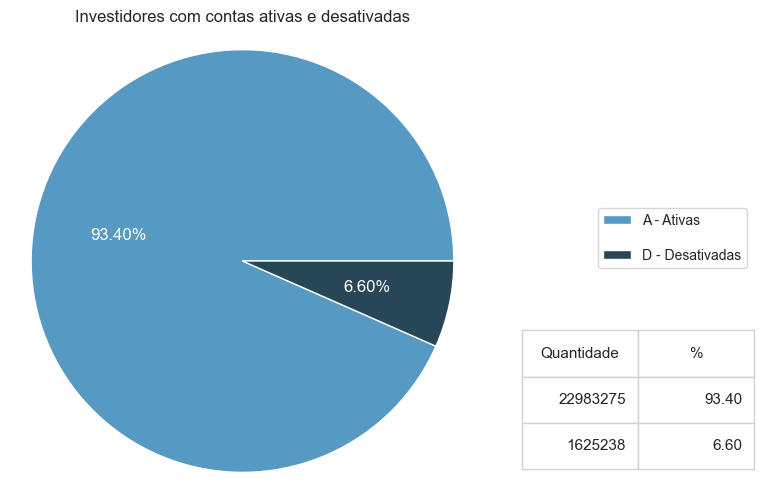

In [43]:
graf_pieplot(df_filtro_01, '%', ['#569AC4', '#274657'],
             'Investidores com contas ativas e desativadas', ['A - Ativas', 'D - Desativadas'])

**Predominância de contas ativas**

A grande maioria dos investidores, **93,40%**, mantém suas contas ativas, o que indica um alto nível de engajamento nas operações do Tesouro Direto. Este resultado sugere que, no período analisado (**2020 a 2023**), os investidores demonstraram continuidade e interesse em manter suas aplicações ativas no programa. Apenas **6,60%** dos investidores desativaram suas contas. Apesar de representar uma minoria, é importante investigar as razões por trás dessas desativações. Compreender os fatores que levam à inatividade pode fornecer insights valiosos sobre a experiência do investidor e áreas potenciais para melhorias no serviço.

#### 5.1.2. Distribuição das contas ativas por gênero

In [44]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta']=='A']

# Agrupar os dados por 'Genero'
df_filtro = df_filtro.groupby(['Genero']).size()

# Calcular a porcentagem de cada categoria
df_filtro_perc = df_filtro / df_filtro.sum() * 100

# Criar um novo DataFrame contendo as quantidades (Qtde) e as porcentagens (%)
df_filtro_02 = pd.DataFrame({'Qtde': df_filtro, '%': df_filtro_perc})

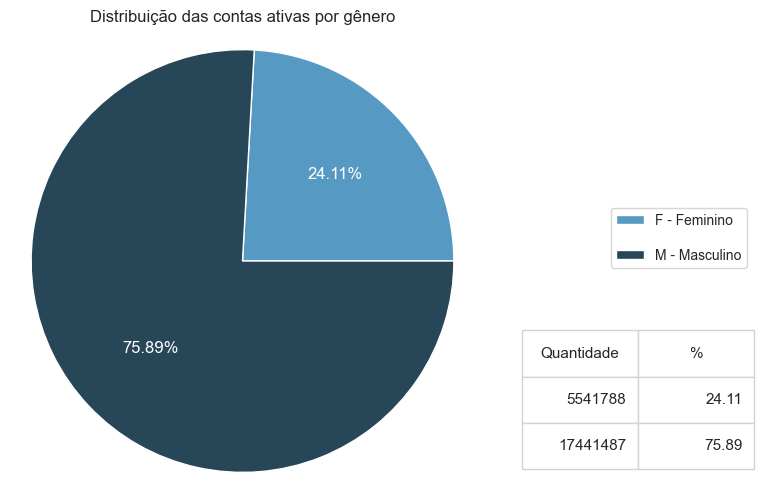

In [45]:
graf_pieplot(df_filtro_02, '%', ['#569AC4', '#274657'],
             'Distribuição das contas ativas por gênero', ['F - Feminino', 'M - Masculino'])

**Predominância do gênero masculino**

O gráfico revela que **75,89%** das contas ativas pertencem ao gênero masculino, enquanto **24,11%** são de investidoras do gênero feminino. Essa disparidade sugere que os homens têm uma maior propensão a investir em produtos financeiros do Tesouro Direto. A menor participação feminina pode indicar a necessidade de se investigar os fatores por trás dessa diferença, como possíveis influências culturais, educacionais, ou de acesso a informações sobre investimentos.

#### 5.1.3. Distribuição das contas ativas por estado civil e gênero

In [46]:
def graf_barplot(dataframe, x, y, title, hue=None, rotation=0, palette='Set2', ax=None, max_label_length=10, fontsize=9):
    '''
    Função para gerar um gráfico barplot.

    :param dataframe: DataFrame
        DataFrame contendo os dados.
    :param x: str
        Nome da coluna a ser plotada no eixo x.
    :param y: str
        Nome da coluna a ser plotada no eixo y.
    :param hue: str, opcional
        Nome da coluna usada para distinguir subcategorias no eixo x.
    :param rotation: int, opcional
        Grau de rotação dos valores das barras do eixo x.
    :param palette: str, opcional
        Paleta de cores pré-definida.
    :param ax: Axes, opcional
        Eixo onde o gráfico será desenhado.
    :param max_label_length: int, opcional
        Tamanho do comprimento dos rótulos no eixo x.
    :param fontsize: int, opcional
        Tamanho da fonte dos rótulos no eixo x.        
    '''
    # Função para simplificar a visualização de grandes números
    def formatar_milhoes(x, _):
        if x >= 1e6:
            return f'{x / 1e6:.1f}M'
        elif x >= 1e3:
            return f'{x / 1e3:.1f}K'
        else:
            return str(int(x))

    # Plotar o gráfico no eixo fornecido
    ax = sns.barplot(data=dataframe, x=x, y=y, hue=hue, palette=palette, ax=ax)

    # Formatar os números do eixo Y para milhões ou milhares
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(formatar_milhoes))

    # Formatar os rótulos do eixo X
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=rotation, ha='center', fontsize=9)
    # Formatar os rótulos do eixo Y
    ax.tick_params(axis='y', labelsize=9)

    # Formatação do título
    ax.set_title(title, loc='center', fontsize=12)
    ax.set(xlabel='', ylabel='')

    # Função para formatar os rótulos das barras
    def formatar_valores(val):
        if val >= 1e6:
            return f'{val / 1e6:.1f}M'
        elif val >= 1e3:
            return f'{val / 1e3:.1f}K'
        else:
            return str(int(val))

    # Adicionar rótulos (valores) nas barras, com a orientação especificada
    for container in ax.containers:
        labels = [formatar_valores(val) for val in container.datavalues]
        ax.bar_label(container, labels=labels, size=9, label_type='edge',
                     rotation=0)

    # Ajusta tamanho dos rótulos e quebra o texto
    labels = [label.get_text() for label in ax.get_xticklabels()]
    wrapped_labels = [textwrap.fill(label, max_label_length)
                      for label in labels]
    ax.set_xticklabels(wrapped_labels, fontsize=fontsize)

    # Ajustar o layout para evitar sobreposição (no eixo específico)
    plt.tight_layout()

In [47]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta']=='A']

# Agrupar os dados por 'Estado Civil' e 'Genero'
df_filtro = df_filtro.groupby(['Estado Civil'])['Genero'].value_counts().sort_values()

# Criar um novo DataFrame
df_filtro_03 = pd.DataFrame(df_filtro)

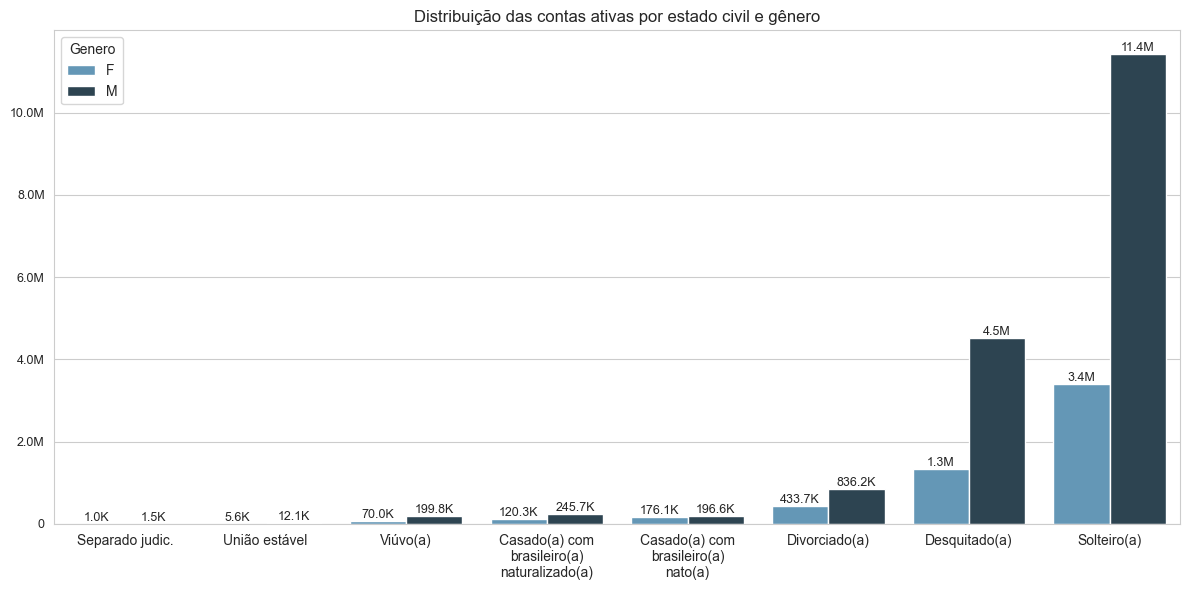

In [48]:
# Criar os subplots
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

graf_barplot(df_filtro_03, 'Estado Civil', 'count', title='Distribuição das contas ativas por estado civil e gênero',
             hue='Genero', rotation=0, palette=['#569AC4', '#274657'], ax=ax, max_label_length=15, fontsize=10)

# Mostrar o gráfico
plt.show()

**Predominância dos solteiros(as)**

O estado civil **solteiro(a)** apresenta a maior concentração de investidores com contas ativas no Tesouro Direto. Destaca-se a disparidade entre os gêneros, com **11,4 milhões** de contas ativas pertencentes ao gênero masculino e **3,4 milhões** ao gênero feminino. Além disso, observa-se um volume considerável de investidores nos estados civis **desquitado(a)** e **divorciado(a)**, com a diferença entre os gêneros se acentuando para os demais estados civis. 
Essa predominância de solteiros(as) sugere que este grupo pode ter maior flexibilidade financeira e disposição para investimentos, ao contrário de outros estados civis que podem estar mais comprometidos com despesas relacionadas a pensões, filhos e outras responsabilidades econômicas. Um estudo mais aprofundado sobre o perfil desse público ajudaria a compreender melhor os fatores que levam solteiros(as) a serem mais propensos a investir, podendo incluir aspectos como maior liberdade financeira, menos responsabilidades familiares e diferentes prioridades econômicas.

#### 5.1.4. Distribuição das contas ativas por gênero e faixa etária

In [49]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta'] == 'A']

# Definir intervalos de faixa etária
bins = [0, 17, 24, 34, 44, 54, 64, df_filtro['Idade'].max()]
labels = ['0 - 17 anos', '18 - 24 anos', '25 - 34 anos',
          '35 - 44 anos', '45 - 54 anos', '55 - 64 anos', '65 anos ou mais']

# Criar uma coluna 'Faixa Etaria' com base nos intervalos de idade
df_filtro['Faixa Etaria'] = pd.cut(df_filtro['Idade'], bins=bins, labels=labels)

# Agrupar os dados por 'Genero' e 'Faixa Etária'
df_filtro = df_filtro.groupby(['Faixa Etaria'])['Genero'].value_counts()

# Criar um novo DataFrame
df_filtro_04 = pd.DataFrame(df_filtro)

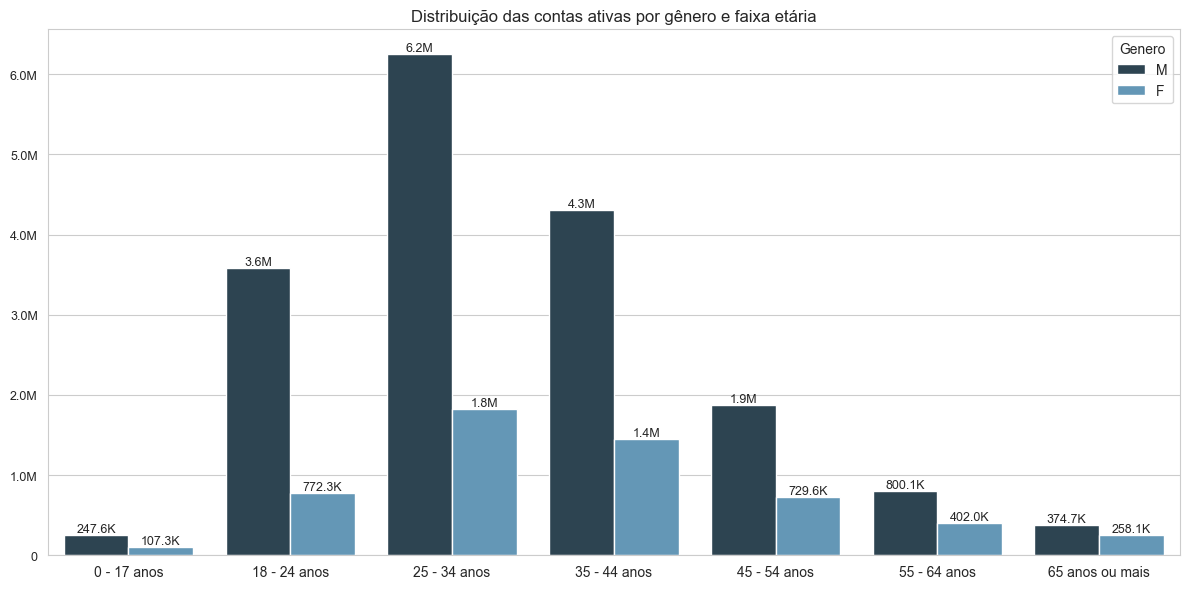

In [50]:
# Criar os subplots
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

graf_barplot(df_filtro_04, 'Faixa Etaria', 'count', title='Distribuição das contas ativas por gênero e faixa etária', 
             hue='Genero', rotation=0, palette=['#274657','#569AC4'], max_label_length=15, fontsize=10)

# Mostrar o gráfico
plt.show()

**Faixa etária de 18 a 44 anos predomina**

As faixas etárias de **18 a 44 anos** concentram a maior parte dos investidores com contas ativas no Tesouro Direto, tanto entre homens quanto mulheres.
As faixas de **18 a 24 anos**, **25 a 34 anos** e **35 a 44 anos** representam os grupos mais ativos economicamente, sugerindo que o Tesouro Direto é amplamente utilizado como uma ferramenta de planejamento financeiro de longo prazo por jovens em início de carreira, jovens adultos e adultos em fase intermediária de suas carreiras.
Por outro lado, observa-se uma queda acentuada no número de investidores a partir dos **45 anos**, o que pode indicar que esses grupos preferem alocar seus recursos em outros tipos de investimento. Fatores como objetivos financeiros e proximidade da aposentadoria também podem influenciar essa mudança de comportamento.
Além disso, a desigualdade de gênero torna-se ainda mais evidente na faixa etária de **25 a 34 anos**, onde há uma disparidade significativa: **6,2 milhões** de homens possuem contas ativas, em contraste com apenas **1,8 milhões** de mulheres.

#### 5.1.5. Distribuição de profissões das contas ativas por gênero

In [51]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta']=='A']

# Filtrar os 10 principais profissões pelo gênero masculino
df_filtro_M = df_filtro[df_filtro['Genero'] == 'M']['Profissao'].value_counts().nlargest(10).reset_index()
df_filtro_M['Genero'] = 'M'

# Filtrar os 10 principais profissões pelo gênero feminino
df_filtro_F = df_filtro[df_filtro['Genero'] == 'F']['Profissao'].value_counts().nlargest(10).reset_index()
df_filtro_F['Genero'] = 'F'

# Concatenar os resultados para ambos os gêneros
df_filtro_05 = pd.concat([df_filtro_M, df_filtro_F], ignore_index=True)

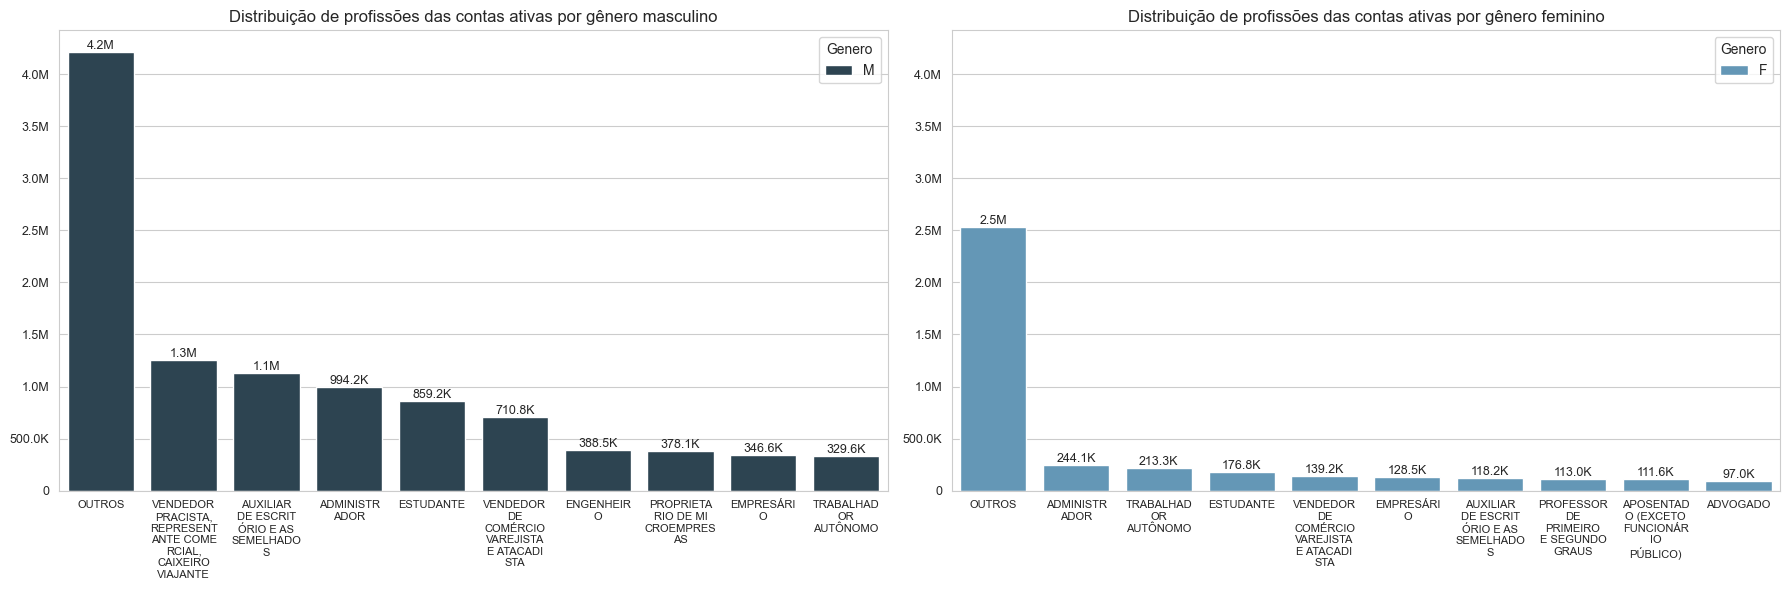

In [52]:
# Criar os subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(18, 6))

# Gráfico para o gênero masculino
graf_barplot(df_filtro_05[df_filtro_05['Genero'] == 'M'], 'Profissao', 'count', hue='Genero',
             title='Distribuição de profissões das contas ativas por gênero masculino', rotation=0, palette=['#274657'],
             ax=ax1, max_label_length=9, fontsize=8)

# Gráfico para o gênero feminino
graf_barplot(df_filtro_05[df_filtro_05['Genero'] == 'F'], 'Profissao', 'count', hue='Genero',
             title='Distribuição de profissões das contas ativas por gênero feminino', rotation=0, palette=['#569AC4'],
             ax=ax2, max_label_length=9, fontsize=8)

# Definir o mesmo limite para o eixo Y em ambos os gráficos
max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)

# Mostrar os gráficos
plt.show()

**Categorias não listadas predominam**

A categoria **Outros** se destaca como a mais representativa tanto entre homens quanto entre mulheres, com **2,5 milhões** de mulheres e **4,2 milhões** de homens. Isso pode indicar que muitas profissões não foram classificadas ou que há uma grande variedade de ocupações que não se enquadram nas categorias predefinidas. Este fato ressalta a necessidade de uma revisão mais detalhada das classificações profissionais ou uma possível expansão do catálogo de ocupações.
Além da categoria **Outros**, entre os homens, as profissões mais prevalentes são **Vendedor Pracista, Representante Comercial e Caixeiro Viajante** (_1,3 milhões de contas_), **Auxiliar de Escritório e assemelhados** (_1,1 milhões contas_), e **Administrador** (_994 mil contas_). Entre as mulheres, as profissões com maior representatividade são **Administrador** (_244 mil contas_), **Trabalhadora Autônoma** (_213 mil contas_), e **Estudante** (_176 mil contas_).

#### 5.1.6. Distribuição das contas ativas de investidores por faixa etária e profissão

In [53]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta']=='A']

# Definir intervalos de faixa etária
bins = [0, 17, 24, 34, 44, 54, 64, 999]
labels = ['0 - 17 anos', '18 - 24 anos', '25 - 34 anos',
          '35 - 44 anos', '45 - 54 anos', '55 - 64 anos', '65 anos ou mais']

# Criar uma coluna 'Faixa Etaria' com base nos intervalos de idade
df_filtro['Faixa Etaria'] = pd.cut(df_filtro['Idade'], bins=bins, labels=labels)

# Agrupar por faixa etária e profissão, e contar o número de ocorrências
df_filtro = df_filtro.groupby(
    ['Faixa Etaria', 'Profissao']).size().reset_index(name='count')

# Para cada faixa etária, pegar as 10 profissões mais comuns
df_filtro = df_filtro.groupby('Faixa Etaria').apply(
    lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

df_filtro_06 = pd.DataFrame(df_filtro)

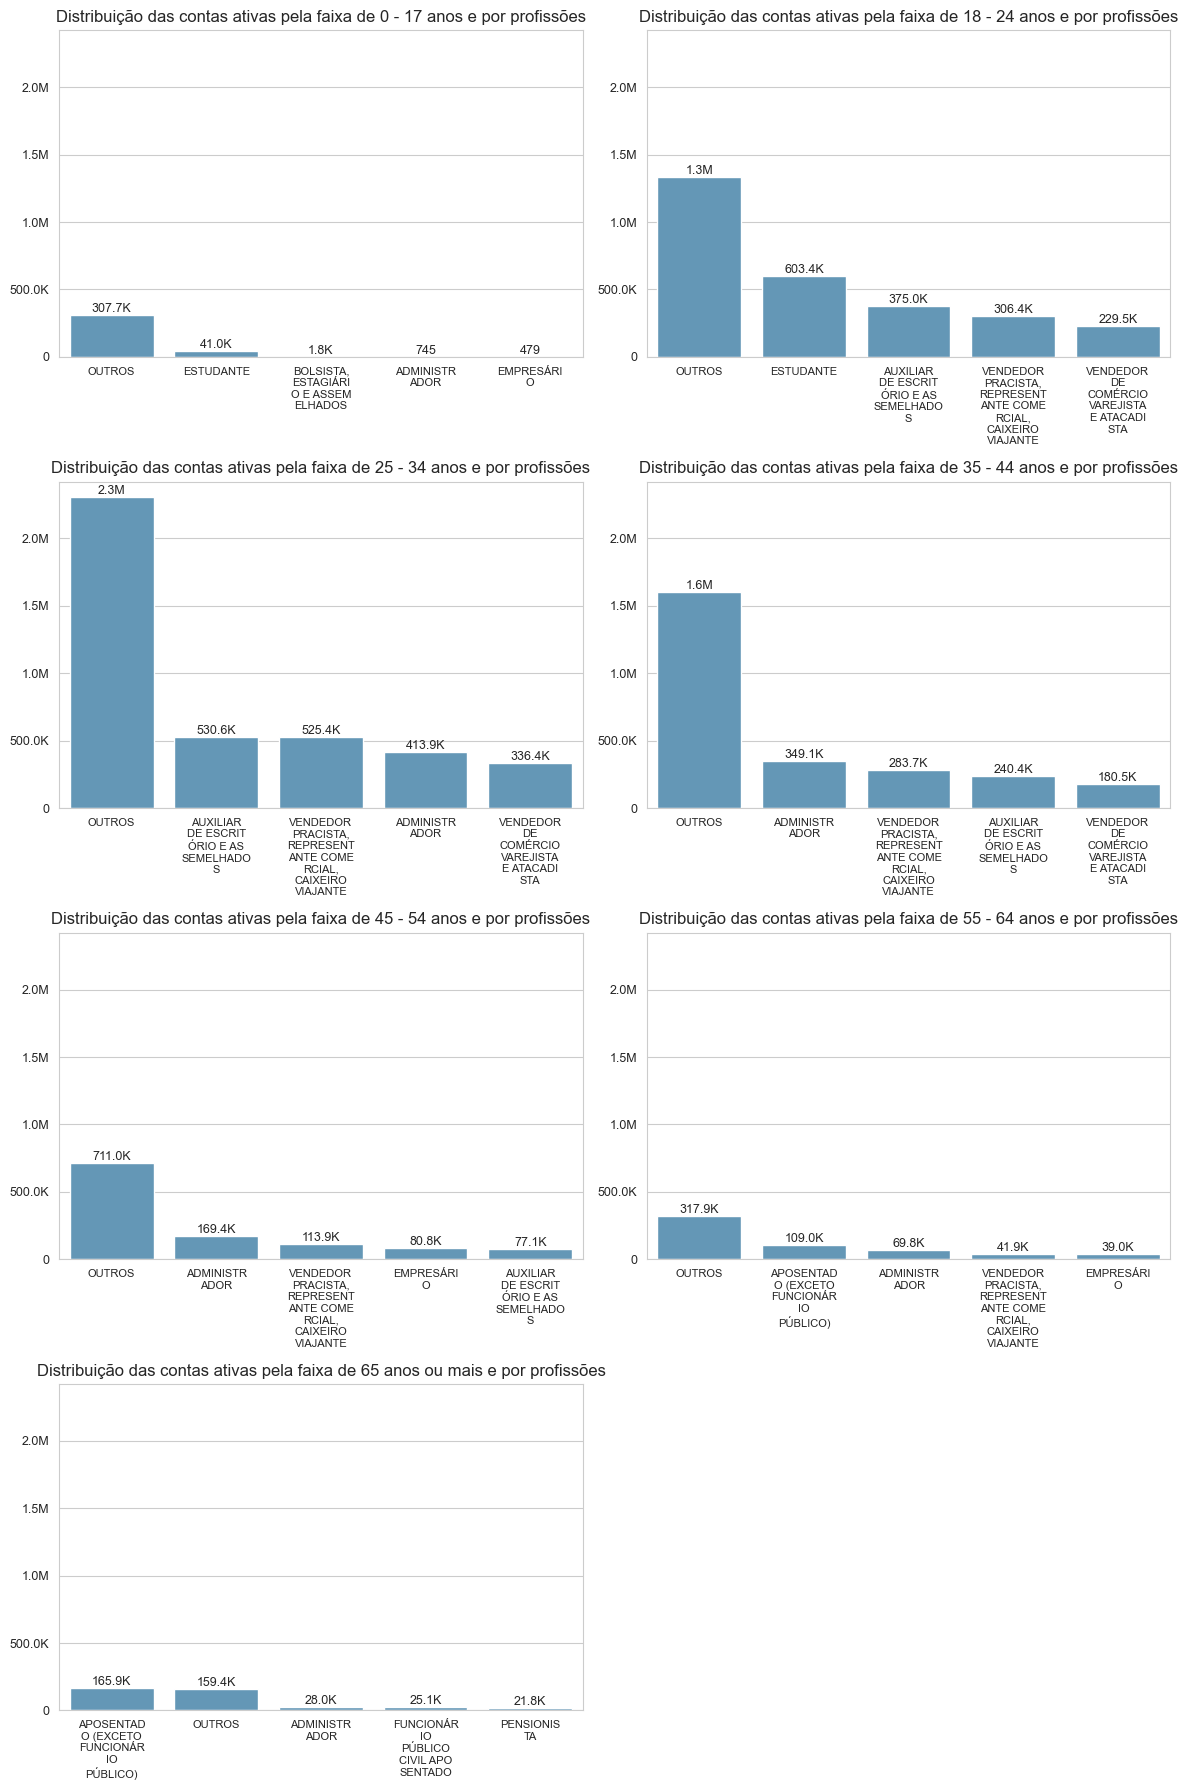

In [54]:
# Criar os subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)
      ) = plt.subplots(ncols=2, nrows=4, figsize=(12, 18))

# Gráfico para a faixa etária de 0 - 17 anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[0]], 'Profissao', 'count', 
             title=f'Distribuição das contas ativas pela faixa de {labels[0]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax1, max_label_length=9, fontsize=8)

# Gráfico para a faixa etária de 18 - 24 anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[1]], 'Profissao', 'count',
             title=f'Distribuição das contas ativas pela faixa de {labels[1]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax2, max_label_length=9, fontsize=8)

# Gráfico para a faixa etária de 25 - 34 anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[2]], 'Profissao', 'count',
             title=f'Distribuição das contas ativas pela faixa de {labels[2]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax3, max_label_length=9, fontsize=8)

# Gráfico para a faixa etária de 35 - 44 anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[3]], 'Profissao', 'count',
             title=f'Distribuição das contas ativas pela faixa de {labels[3]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax4, max_label_length=9, fontsize=8)

# Gráfico para a faixa etária de 45 - 54 anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[4]], 'Profissao', 'count',
             title=f'Distribuição das contas ativas pela faixa de {labels[4]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax5, max_label_length=9, fontsize=8)

# Gráfico para a faixa etária de 55 - 64 anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[5]], 'Profissao', 'count',
             title=f'Distribuição das contas ativas pela faixa de {labels[5]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax6, max_label_length=9, fontsize=8)

# Gráfico para a faixa etária de 65 anos ou mais anos
graf_barplot(df_filtro_06[df_filtro_06['Faixa Etaria'] == labels[6]], 'Profissao', 'count', 
             title=f'Distribuição das contas ativas pela faixa de {labels[6]} e por profissões', rotation=0, palette=['#569AC4'],
             ax=ax7, max_label_length=9, fontsize=8)

# Remover o último subplot vazio
fig.delaxes(ax8)

# Definir o mesmo limite para o eixo Y em ambos os gráficos
max_y = max(ax1.get_ylim()[1], ax2.get_ylim()[1], ax3.get_ylim()[
            1], ax4.get_ylim()[1], ax5.get_ylim()[1], ax6.get_ylim()[1], ax7.get_ylim()[1])
ax1.set_ylim(0, max_y)
ax2.set_ylim(0, max_y)
ax4.set_ylim(0, max_y)
ax5.set_ylim(0, max_y)
ax6.set_ylim(0, max_y)
ax7.set_ylim(0, max_y)

# Mostrar os gráficos
plt.show()

**Categorias não listadas predominam nas faixas etárias**

A categoria **Outros** destaca-se como a mais representativa em seis faixas etárias, abrangendo de **0 a 64 anos**, com uma predominância significativa nas faixas de **18 a 24 anos** (_1,3 milhões de contas_), **25 a 34 anos** (_2,3 milhões de contas_) e **35 a 44 anos** (_1,6 milhões de contas_). 
Na faixa etária de **18 a 24 anos**, a categoria **Estudante** é a segunda mais representativa, com **603 mil contas**. Isso sugere que muitos jovens estão começando a desenvolver um interesse em educação financeira e investimentos.
Em contraste, na faixa etária de **65 anos ou mais**, a categoria predominante é **Aposentado (exceto funcionário público)**, com **165 mil contas**. Essa predominância está alinhada com a faixa etária e pode indicar uma maior propensão desse grupo a investir no Tesouro Direto, possivelmente devido à estabilidade financeira proporcionada pela aposentadoria.

### 5.2. Padrões regionais de investimento

#### 5.2.1. Distribuição de investidores com contas ativas por estado

In [55]:
def graf_mapa(shapefile, dataframe, left_on, right_on, how='left', column='count', cmap='YlOrBr', edgecolor='#000000'):
    '''
    Função para gerar um mapa temático com dados combinados de um shapefile e um DataFrame.

    :param shapefile: str
        Caminho para o arquivo de shapefile.
    :param dataframe: DataFrame
        DataFrame que contém os dados a serem representados no mapa.
    :param left_on: str
        Nome da coluna no GeoDataFrame (shapefile) que será usada para realizar o merge com o DataFrame.
    :param right_on: str
        Nome da coluna no DataFrame que será usada para realizar o merge com o GeoDataFrame.
    :param how: str, opcional
        Tipo de junção a ser usada na combinação entre os dados geoespaciais e os dados do DataFrame.
    :param column: str, opcional
        Nome da coluna no DataFrame que contém os valores a serem plotados no mapa.
    :param cmap: str, opcional
        Nome da paleta de cores a ser usada para colorir o mapa.
    :param edgecolor: str, opcional
        Cor dos contornos que delimitam as regiões no mapa.
    '''
    # Carregar o shapefile (GeoDataFrame)
    map_shapefile = shapefile
    map = gpd.read_file(map_shapefile)
    
    # Remover acentos e transformar nomes das cidades em maiúsculo
    map[left_on] = map[left_on].apply(lambda x: unidecode(x).upper())

    # Fazer o merge entre o GeoDataFrame e o DataFrame
    map = map.merge(dataframe, how=how, left_on=left_on, right_on=right_on)
    
    # Substituir valores nulos por zero na coluna
    map[column] = map[column].fillna(0)

    # Plotar o mapa do Brasil com as contagens de investidores por estado
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Função para formatar os rótulos das barras
    def formatar_valores(val, _):
        if val >= 1e6:
            return f'{val / 1e6:.1f}M'
        elif val >= 1e3:
            return f'{val / 1e3:.1f}K'
        else:
            return str(int(val))

    # Formatação do mapa
    map.plot(column=column, cmap=cmap, legend=True, ax=ax, edgecolor=edgecolor,
                legend_kwds={'label': '',
                            'orientation': 'vertical',
                            'fraction': 0.02,
                            'pad': -0.01,
                            'format': formatar_valores})

    # Remover grades e barras de eixos
    ax.grid(False)
    ax.set_axis_off()

In [56]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta'] == 'A']

# Contar o número de investidores por estado
df_filtro_07 = df_filtro['UF do Investidor'].value_counts().reset_index()

# Criar um novo DataFrame
df_filtro_07 = pd.DataFrame(df_filtro_07)

In [57]:
# Criar mapa de cores gradientes
colors_map = sns.color_palette("blend:#ecf4f8,#569AC4", as_cmap=True)

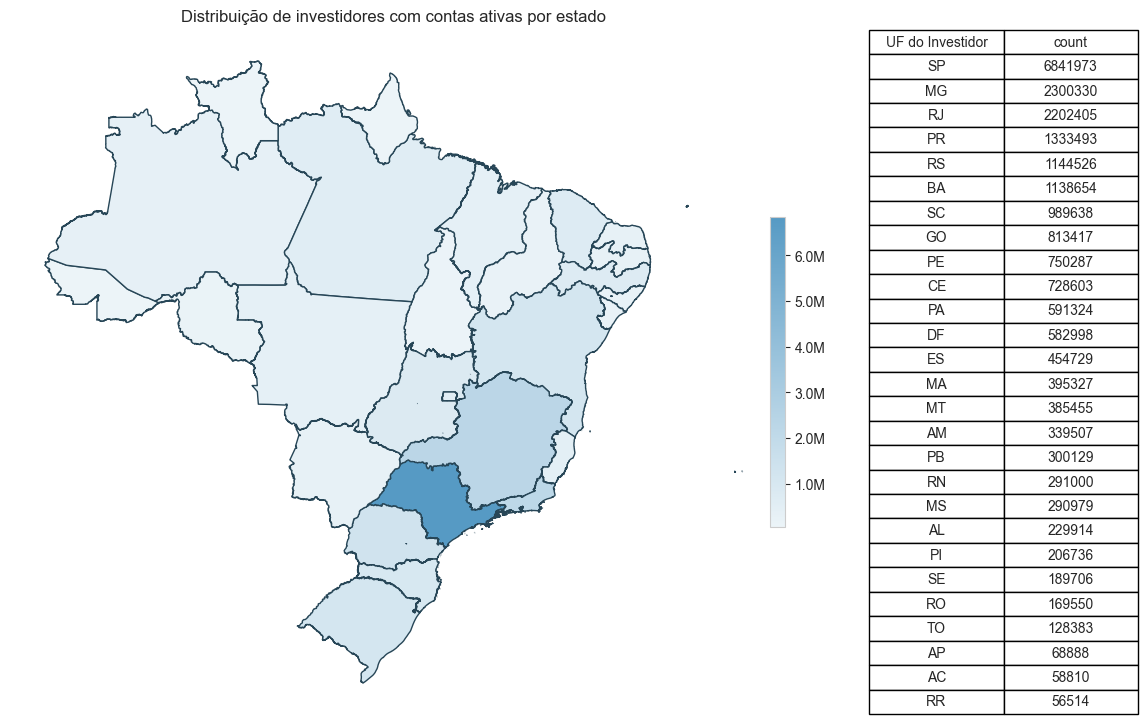

In [58]:
graf_mapa('mapa/BR_UF_2022.shp', df_filtro_07, 'SIGLA_UF', 'UF do Investidor', cmap=colors_map, edgecolor='#274657')

# Adicionar uma tabela com os estados e o total de investidores à direita
table_data = df_filtro_07.sort_values(by='count', ascending=False)
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='right',
                  bbox=[1.12, 0, 0.35, 1])
  
# Título
plt.title('Distribuição de investidores com contas ativas por estado', fontsize=12)
plt.show()

**Predomínio do estado de São Paulo (SP)**

São Paulo (**SP**) é o estado com o maior número de investidores, totalizando **6,8 milhões de contas ativas**. Isso indica uma alta concentração de investidores e um significativo interesse em investimentos no Tesouro Direto.
Outros estados do Sudeste, além de São Paulo, incluem **Minas Gerais (MG)** com **2,3 milhões de contas** e **Rio de Janeiro (RJ)** com **2,2 milhões de contas**. Juntos, esses três estados representam uma grande parte do total de investidores, evidenciando a concentração de investimentos nas regiões mais desenvolvidas economicamente do Brasil.
Além disso, os estados do **Paraná (PR)** e **Rio Grande do Sul (RS)** representam a região Sul, enquanto **Bahia (BA)** é um dos principais estados da região Nordeste. Esses seis estados ocupam as seis primeiras posições em número de investidores.

#### 5.2.2. Ranking de cidades com mais investidores com contas ativas

In [59]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[df_001['Situacao da Conta'] == 'A']

# Agrupar por faixa etária e profissão, e contar o número de ocorrências
df_filtro = df_filtro.groupby(
    ['UF do Investidor', 'Cidade do Investidor']).size().reset_index(name='count')

# Criar uma nova coluna para o formato 'cidade - uf'
df_filtro['Cidade - UF do Investidor'] = df_filtro['Cidade do Investidor'] + \
    ' - ' + df_filtro['UF do Investidor']

# Ordenar pelos maiores valores e pegar as 20 cidades com mais investidores
df_filtro = df_filtro.sort_values(by='count', ascending=False).head(10).reset_index()

# Criar um novo DataFrame
df_filtro_08 = pd.DataFrame(df_filtro[['Cidade - UF do Investidor', 'count']])

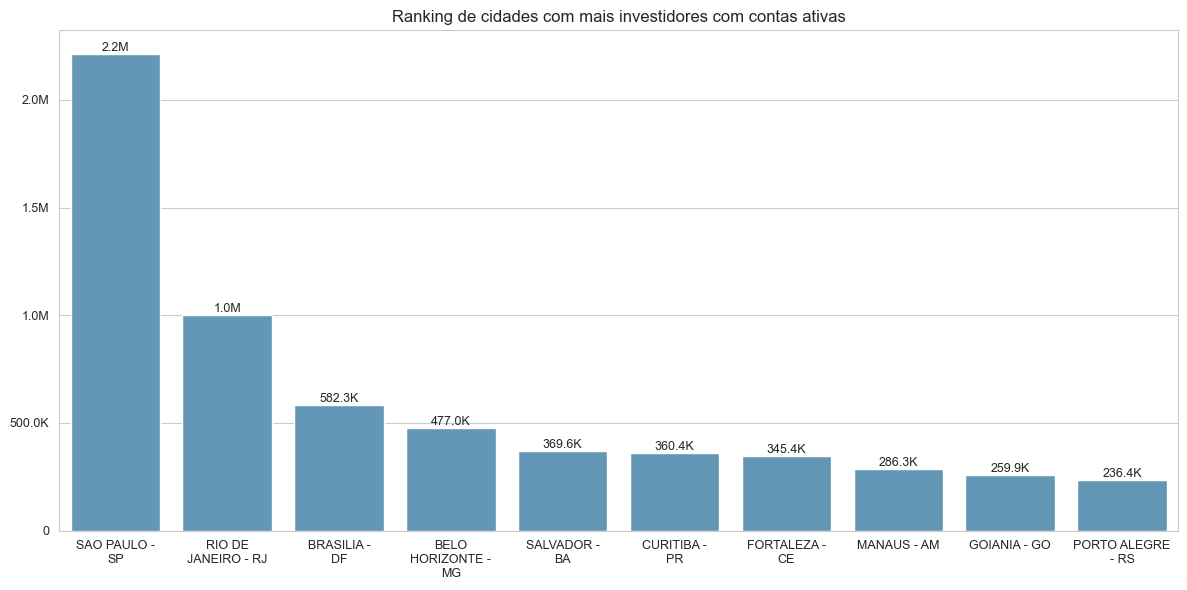

In [60]:
# Criar os subplots
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

graf_barplot(df_filtro_08, 'Cidade - UF do Investidor', 'count',
             'Ranking de cidades com mais investidores com contas ativas', rotation=0,
             palette=['#569AC4'], max_label_length=12, fontsize=9)

# Mostrar o gráfico
plt.show()

**Liderança da Cidade de São Paulo (SP)**

A cidade de **São Paulo (SP)** lidera com o maior número de investidores, somando **2,2 milhões de contas ativas**, mais que o dobro da segunda colocada, **Rio de Janeiro (RJ)**, que conta com **1 milhão de contas**.
Todas as dez cidades no ranking são capitais, com **Brasília (DF)**, a capital do país, ocupando a terceira posição com **582 mil contas**. O ranking também reflete a diversidade regional do Brasil, com representantes de todas as regiões.
Essa concentração de investidores nos grandes centros urbanos provavelmente reflete tanto a densidade populacional quanto o nível de desenvolvimento econômico dessas cidades.

#### 5.2.3. Ranking de cidades no estado de São Paulo com mais investidores com contas ativas

In [61]:
# Filtrar os dados para 'Situacao da Conta' igual a 'A'
df_filtro = df_001[(df_001['Situacao da Conta'] == 'A') & (df_001['UF do Investidor'] == 'SP')]

# Contar o número de ocorrências de cada cidade
df_filtro = df_filtro['Cidade do Investidor'].value_counts().reset_index(name='count')

# Ordenar pelos maiores valores e as cidades com mais investidores
df_filtro = df_filtro.sort_values(by='count', ascending=False).reset_index(drop=True)

# Criar um novo DataFrame
df_filtro_09 = pd.DataFrame(df_filtro)

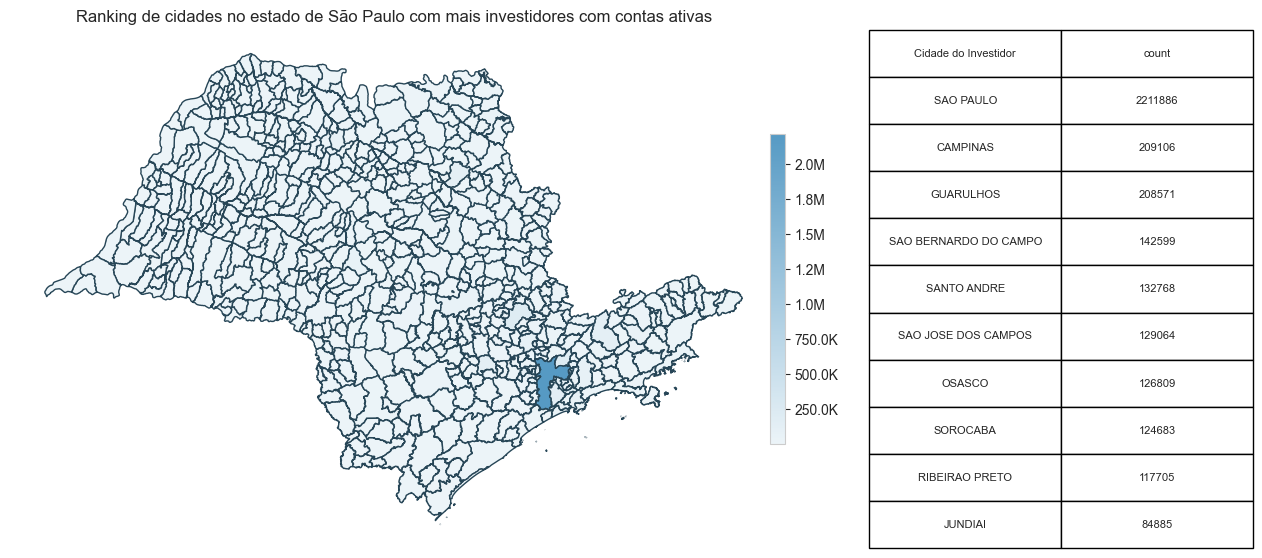

In [62]:
graf_mapa('mapa/SP_Municipios_2022.shp', df_filtro_09, 'NM_MUN', 'Cidade do Investidor', cmap=colors_map, edgecolor='#274657')

# Adicionar uma tabela com os estados e o total de investidores à direita
table_data = df_filtro_09.head(10).sort_values(by='count', ascending=False)
table = plt.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='right',
                  bbox=[1.12, 0, 0.5, 1])
  
# Título
plt.title('Ranking de cidades no estado de São Paulo com mais investidores com contas ativas', fontsize=12)
plt.show()

**Ranking das cidades de São Paulo (SP)**

A cidade de **São Paulo** continua a liderar com o maior número de investidores, somando **2,2 milhões de contas ativas**. Na segunda posição, aparece **Campinas**, com **209 mil contas**, seguida por **Guarulhos**, que conta com **208 mil contas**.
Das cidades no ranking, cinco fazem parte da **Região Metropolitana de São Paulo (RMSP)**: **Guarulhos**, **São Bernardo do Campo**, **Santo André** e **Osasco**, que, somadas, totalizam mais de **2,8 milhões de contas de investidores**. Esses números refletem a alta densidade populacional e a importância econômica da região.
As demais cidades do ranking, distribuídas no _interior do estado_, como **Campinas**, **São José dos Campos**, **Ribeirão Preto**, **Sorocaba** e **Jundiaí**, somam **665 mil contas**, um número bastante expressivo, demonstrando também o forte interesse por investimentos em áreas fora da capital e da região metropolitana.

### 5.3. Comportamento operacional dos investidores

#### 5.3.1. Comparação de contas Ativas/Desativadas por faixa etária

In [63]:
# Gerando uma cópia dos dados para execução da análise
df_filtro = df_001.copy()

# Definir intervalos de faixa etária
bins = [0, 17, 24, 34, 44, 54, 64, df_filtro['Idade'].max()]
labels = ['0 - 17 anos', '18 - 24 anos', '25 - 34 anos',
          '35 - 44 anos', '45 - 54 anos', '55 - 64 anos', '65 anos ou mais']

# Criar uma coluna 'Faixa Etaria' com base nos intervalos de idade
df_filtro['Faixa Etaria'] = pd.cut(df_filtro['Idade'], bins=bins, labels=labels)

# Agrupar os dados por 'Situacao da Conta' e 'Faixa Etária'
df_filtro = df_filtro.groupby(['Faixa Etaria'])['Situacao da Conta'].value_counts()

# Criar um novo DataFrame
df_filtro_10 = pd.DataFrame(df_filtro)

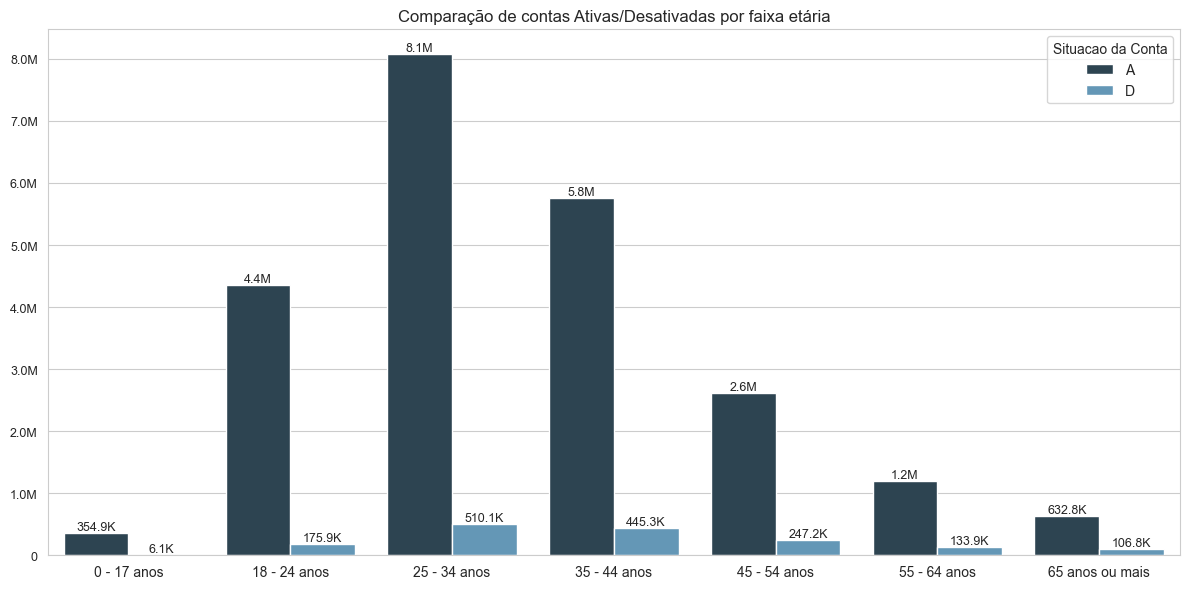

In [64]:
# Criar os subplots
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))

graf_barplot(df_filtro_10, 'Faixa Etaria', 'count', title='Comparação de contas Ativas/Desativadas por faixa etária', 
             hue='Situacao da Conta', rotation=0, palette=['#274657','#569AC4'], max_label_length=15, fontsize=10)

# Mostrar o gráfico
plt.show()

**Prevalência de contas ativas**

As contas ativas (A) predominam em todas as faixas etárias, refletindo o grande número de investidores que mantêm suas contas no Tesouro Direto. A faixa etária de **25 a 34 anos** é a mais representativa, com cerca de **8,1 milhões de contas ativas**, seguida pela faixa de **35 a 44 anos**, que possui **5,8 milhões de contas ativas**.
À medida que a idade avança, a quantidade de contas ativas tende a diminuir. O declínio mais acentuado ocorre na faixa de **65 anos ou mais**, com **632 mil contas ativas**, um número que é próximo ao dobro da faixa de **0 a 17 anos**, que registra **354 mil contas ativas**.
No que diz respeito às contas desativadas, a faixa etária de **25 a 34 anos** apresenta a maior concentração, com **510 mil contas desativadas**. Em contraste, a faixa de **0 a 17 anos** possui apenas **6,1 mil contas desativadas**, sugerindo uma tendência de retenção das contas entre os investidores mais jovens.

#### 5.3.2. Contas Ativas/Desativadas por profissão e estado civil

In [65]:
# Gerar uma cópia dos dados para evitar modificar o DataFrame original
df_filtro = df_001.copy()

# Agrupar por 'Estado Civil', 'Profissao' e 'Situacao da Conta' e contar o número de ocorrências
df_filtro_1 = df_filtro.groupby(
    ['Estado Civil', 'Profissao', 'Situacao da Conta']).size().reset_index(name='count')

# Somar a contagem para cada 'Estado Civil' e 'Profissao', independentemente da 'Situacao da Conta'
df_filtro_2 = df_filtro_1.groupby(['Estado Civil', 'Profissao'])['count'].sum().reset_index()

# Agora, para cada combinação de 'Estado Civil', selecionar as 3 profissões mais comuns
df_filtro_3 = df_filtro_2.groupby('Estado Civil').apply(
    lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# Unir os dados originais para manter a distinção de 'Situacao da Conta'
df_filtro_11 = pd.merge(df_filtro_1, df_filtro_3, on=['Estado Civil', 'Profissao'], how='inner')


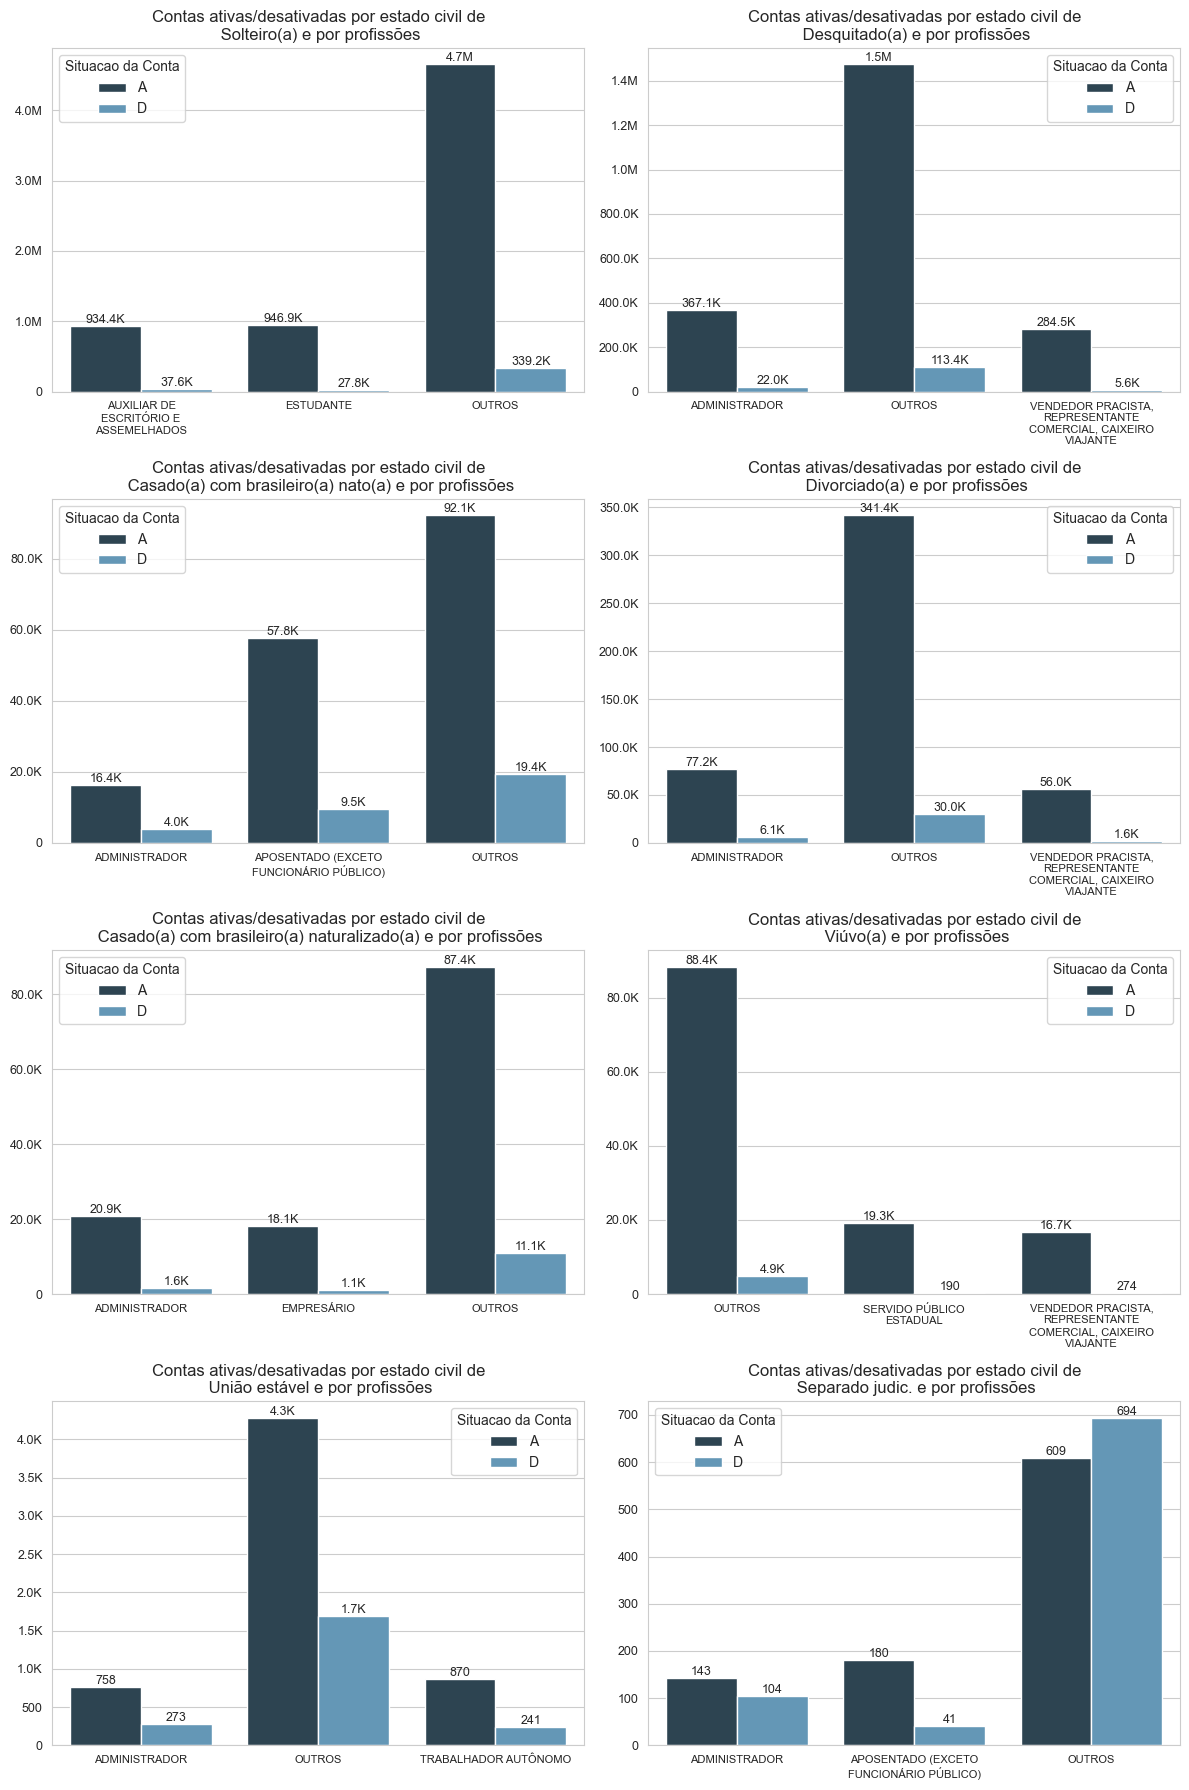

In [66]:
# Lista contendo os valores únicos de 'Estado Civil'
labels = df_filtro['Estado Civil'].unique()

# Criar os subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)
      ) = plt.subplots(ncols=2, nrows=4, figsize=(12, 18))

# Gráfico para o estado civil 'Casado(a) com brasileiro(a) nato(a)'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[0]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[0]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax1, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'Desquitado(a)'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[1]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[1]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax2, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'Casado(a) com brasileiro(a) nato(a)'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[2]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[2]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax3, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'Divorciado(a)'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[3]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[3]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax4, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'Casado(a) com brasileiro(a) naturalizado(a)'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[4]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[4]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax5, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'Viúvo(a)'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[5]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[5]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax6, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'União estável'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[6]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[6]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax7, max_label_length=20, fontsize=8)

# Gráfico para o estado civil 'Separado judic.'
graf_barplot(df_filtro_11[df_filtro_11['Estado Civil'] == labels[7]], 'Profissao', 'count_x', hue='Situacao da Conta', 
             title=f'Contas ativas/desativadas por estado civil de\n {labels[7]} e por profissões', rotation=0, 
             palette=['#274657','#569AC4'], ax=ax8, max_label_length=20, fontsize=8)

# Mostrar os gráficos
plt.show()

**Categorias não listadas predominam entre as profissões**

Em quase todas as combinações de estado civil e profissão, o número de **contas ativas (A)** supera significativamente o de **contas desativadas (D)**, indicando que a maioria dos investidores mantém suas contas ativas no Tesouro Direto.
A categoria **Outros**, que engloba profissões não detalhadas na classificação oficial do Tesouro Direto, é predominante em todos os estados civis. Destacam-se os investidores com estado civil **Solteiro(a)** e **Desquitado(a)**, que possuem os maiores números de contas ativas nessa categoria, com **4,7 milhões** e **1,5 milhões**, respectivamente.
Uma particularidade interessante surge no estado civil **Separado judicialmente**, para a categoria **Outros**, o número de **694 contas desativadas** supera as **609 contas ativas**. Esse é um comportamento atípico, não observado em nenhuma outra combinação de estado civil e profissão. Uma possível explicação para esse fenômeno pode estar relacionada à instabilidade financeira ou pessoal que a separação judicial pode ocasionar, impactando a decisão de desativar as contas de investimento. Esse ponto merece uma análise mais aprofundada para entender melhor as motivações.

## 6. Conclusões

Utilizando dados abrangendo o período de janeiro de 2020 a dezembro de 2023, o projeto de análise dos investidores do Tesouro Direto teve como principais objetivos compreender o perfil demográfico dos investidores, analisar padrões regionais de investimento e o comportamento operacional dos investidores. Foram examinados diversos aspectos das contas ativas e desativadas para fornecer insights estratégicos que visam melhorar a captação de novos investidores e reduzir a taxa de desativações de contas.

### 6.1. Insights obtidos

**Perfil demográfico dos investidores**

- As contas ativas representam 93,40% (22,9 milhões) do total de investidores durante o período de três anos. No entanto, 6,6% (1,6 milhões) desativaram suas contas, o que, embora seja uma minoria, ainda é um número significativo no cenário nacional.
- Considerando apenas as contas ativas, observa-se que a representação feminina corresponde a aproximadamente 25% do total de investidores, sugerindo que o gênero masculino tem maior interesse em investimentos no Tesouro Direto.
- Para ambos os gêneros, os investidores que estão "sozinhos" (solteiro(a), desquitado(a) e divorciado(a)) concentram o maior número de contas ativas, somando aproximadamente 21,8 milhões.
- A maior concentração de investidores está entre 18 e 44 anos, abrangendo estudantes e profissionais em início ou meio de carreira. A partir dos 45 anos, observa-se um declínio gradual no número de investidores.
- Aproximadamente 6,6 milhões de investidores classificaram sua profissão como "Outros", ou seja, suas ocupações não se enquadram nas categorias disponibilizadas pelo Tesouro Direto. Entre os investidores com mais de 65 anos, a categoria "Aposentado (Exceto funcionário público)" predomina, com 165 mil contas ativas.

**Padrões regionais de investimento**

- A região sudeste domina o cenário de investimentos, com São Paulo, Minas Gerais e Rio de Janeiro somando 11,3 milhões de investidores. São Paulo se destaca com 6,8 milhões de contas ativas.
- Em termos de cidades, São Paulo (SP), Rio de Janeiro (RJ), Brasília (DF), Belo Horizonte (MG) e Salvador (BA) juntas representam 4,6 milhões de contas ativas no Tesouro Direto.
- No estado de São Paulo, há um predomínio de cidades da "Grande São Paulo" e do interior paulista, com essas cidades somando mais de 3,4 milhões de investidores.

**Comportamento operacional dos investidores**

- A faixa etária entre 25 e 34 anos tem o maior número de contas ativas (8,1 milhões). No entanto, também é o grupo com o maior número de desativações, com 510 mil contas encerradas.

- Em termos de profissões e estados civis, a categoria "Outros" predomina em todos os cenários. Entre os solteiros, destacam-se 4,7 milhões de contas ativas e 339 mil contas desativadas. Já a categoria "Separado judicialmente", apresenta mais contas desativadas (694 mil) do que ativas (609 mil).

### 6.2. Recomendações

**Captação de investidores**

- Campanhas de marketing segmentadas: Direcionar campanhas para públicos específicos, como mulheres e faixas etárias mais avançadas, utilizando canais de comunicação que alcancem esses grupos de maneira eficaz.
- Educação financeira: Investir em programas de educação financeira voltados para jovens e mulheres, promovendo o Tesouro Direto como uma opção de investimento seguro e acessível.
- Monitoramento contínuo: Analisar os perfis que aderiram ao programa em intervalos regulares (mensais, semestrais e anuais) para ajustar as estratégias de captação.

**Redução de desativações**

- Entendimento das motivações: É crucial entender os motivos que levam os investidores a desativar suas contas. Isso pode incluir o alcance de objetivos financeiros ou dificuldades econômicas. Recomenda-se a elaboração de pesquisas para identificar pontos de atração e repulsão ao Tesouro Direto. Com base nesses insights, estratégias de retenção podem ser desenvolvidas.
- Pesquisas de satisfação: Elaborar pesquisas que identifiquem os pontos atrativos e os aspectos que precisam ser melhorados no Tesouro Direto, criando ações direcionadas à manutenção das contas.

**Investimentos**

A captação e a retenção de investidores demandam investimentos contínuos, tanto na coleta de dados (como pesquisas e feedback de usuários) quanto no desenvolvimento de campanhas de marketing em diversas plataformas. Também é necessário elaborar métricas de acompanhamento, como taxas de conversão, satisfação dos investidores e desativação de contas, para medir a eficácia das estratégias. É fundamental a elaboração de um orçamento detalhado para garantir que as estratégias alcancem os objetivos traçados e com estimativas claras de retorno sobre o investimento (ROI).